# Analisi Covid_19 
##### Analisi a livello regionale:
* Ogni regione grafico singolo
* Todo: aggiungere mortalità per regione
##### Analisi a livello nazionale
* Casi totali Italia
* Aggiungere proporzione guariti/terapia intensiva

#### TODO:
* Generazione giornalieria automatica
* Devo aggiustare il codice che è disordinato e senza commenti
* Scrivere un Readme.md come si deve

In [51]:
# Importo librerie e apro primo .csv (livello regionale)

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')

In [54]:
# Lista regioni

regione_tot = ['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia Romagna', 
               'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 
               'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto'
]

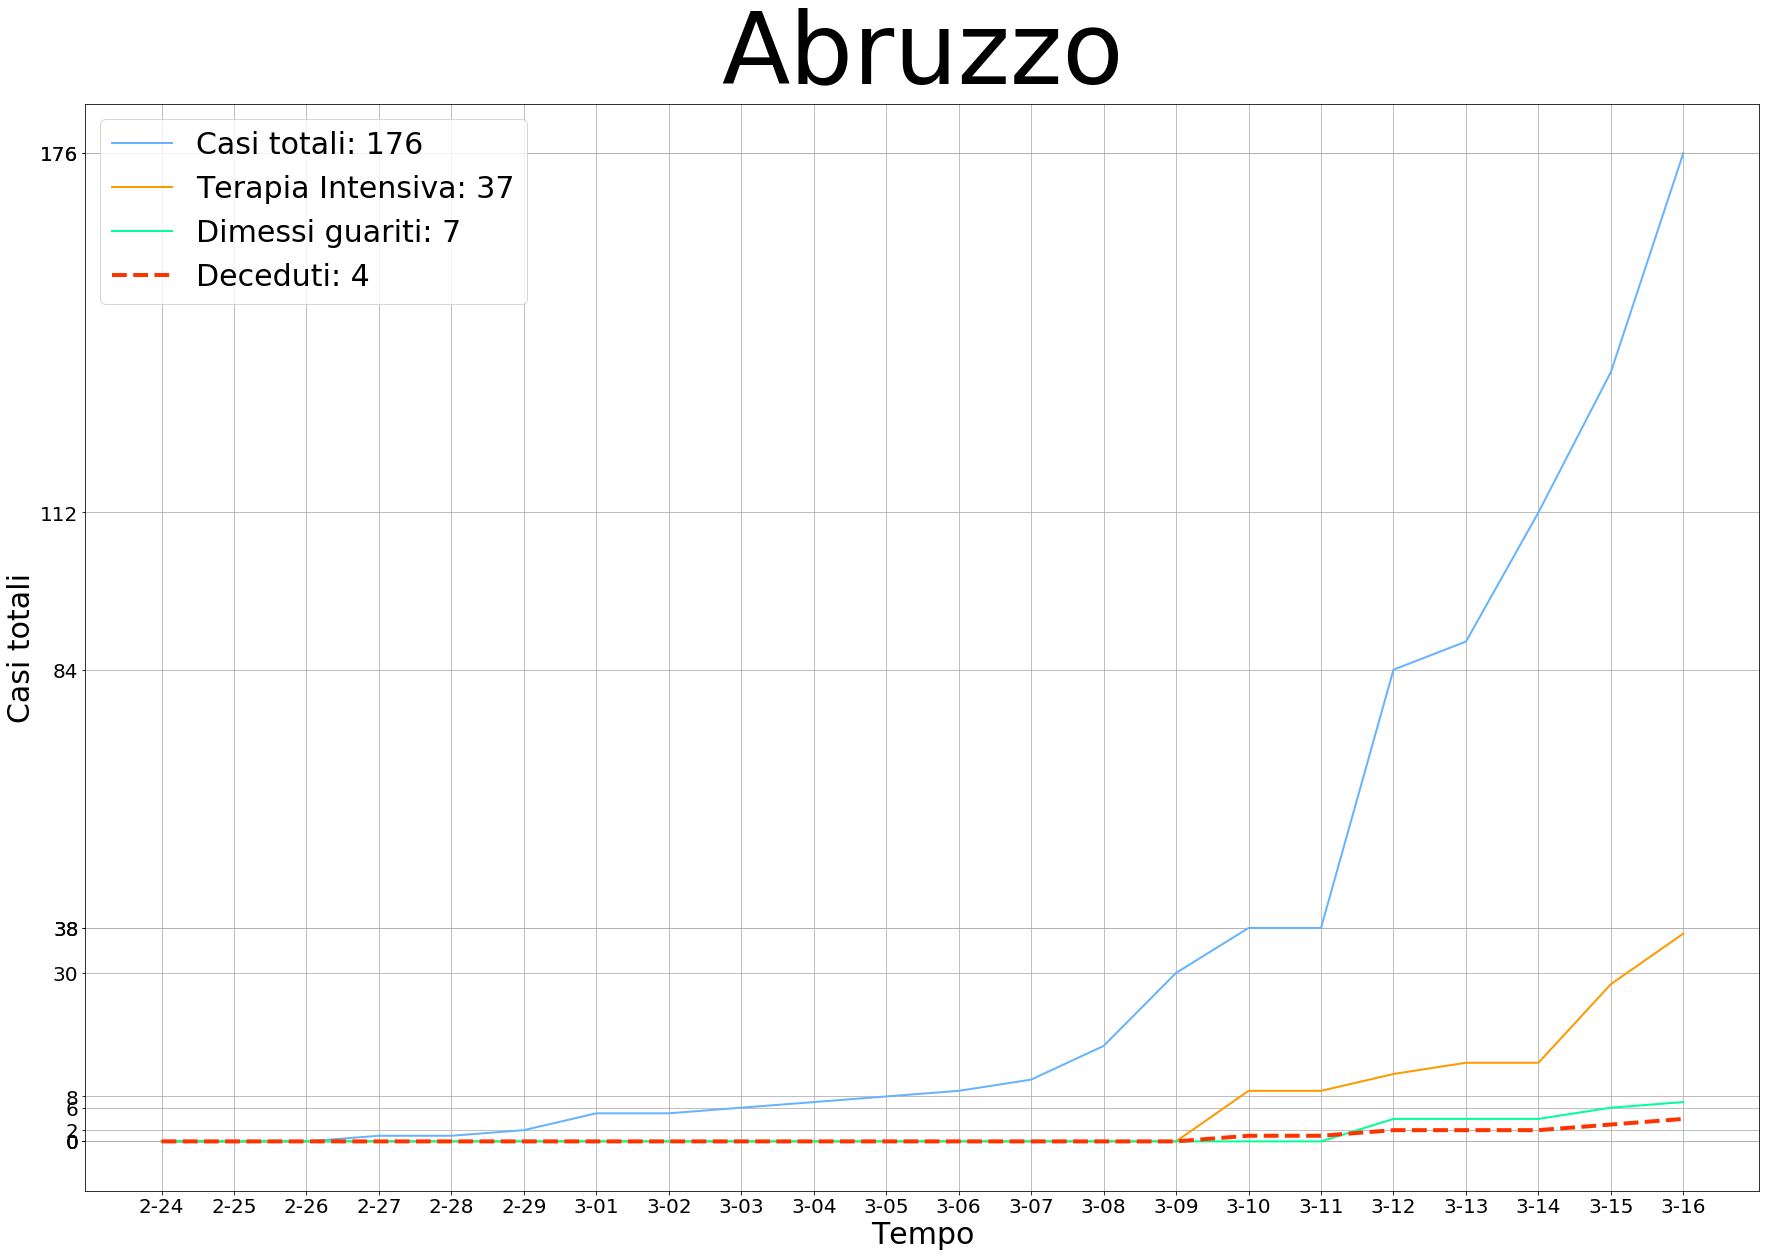

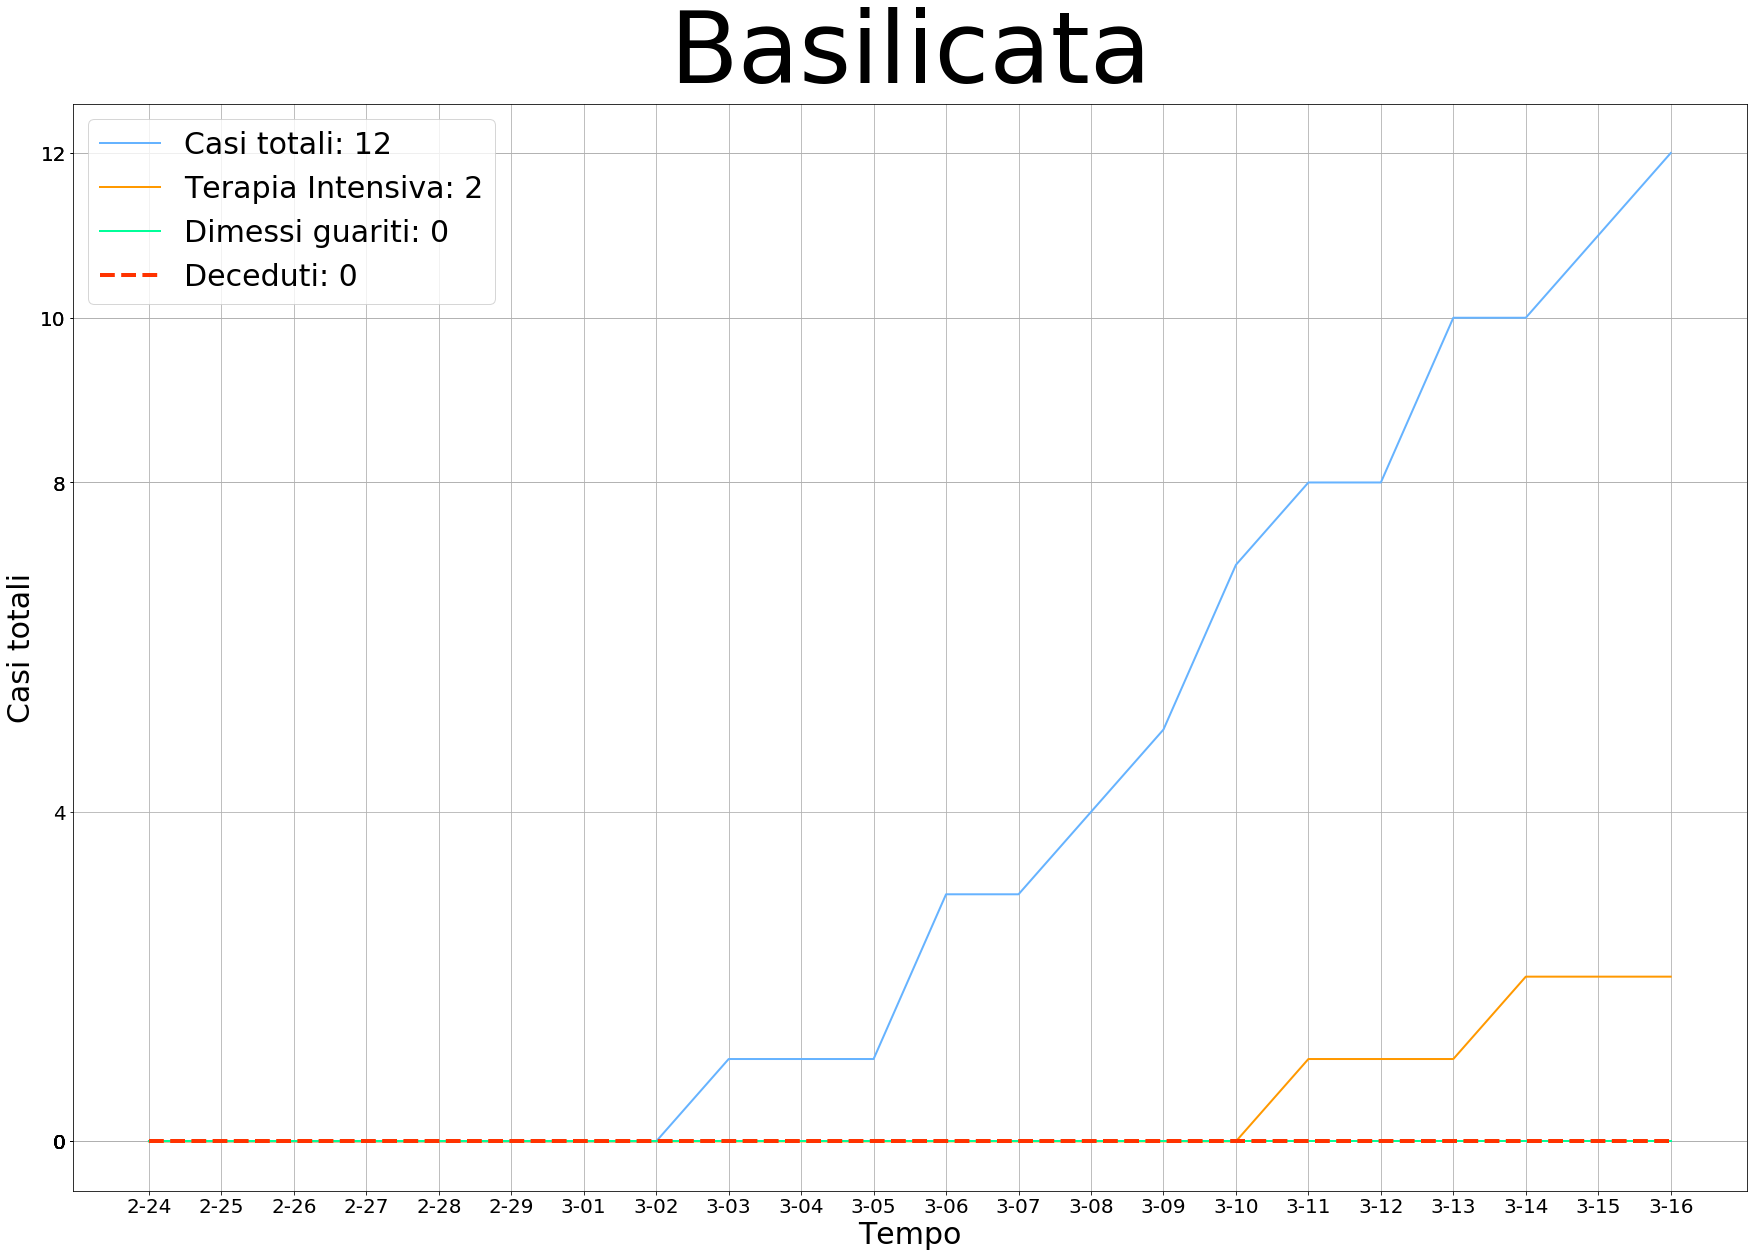

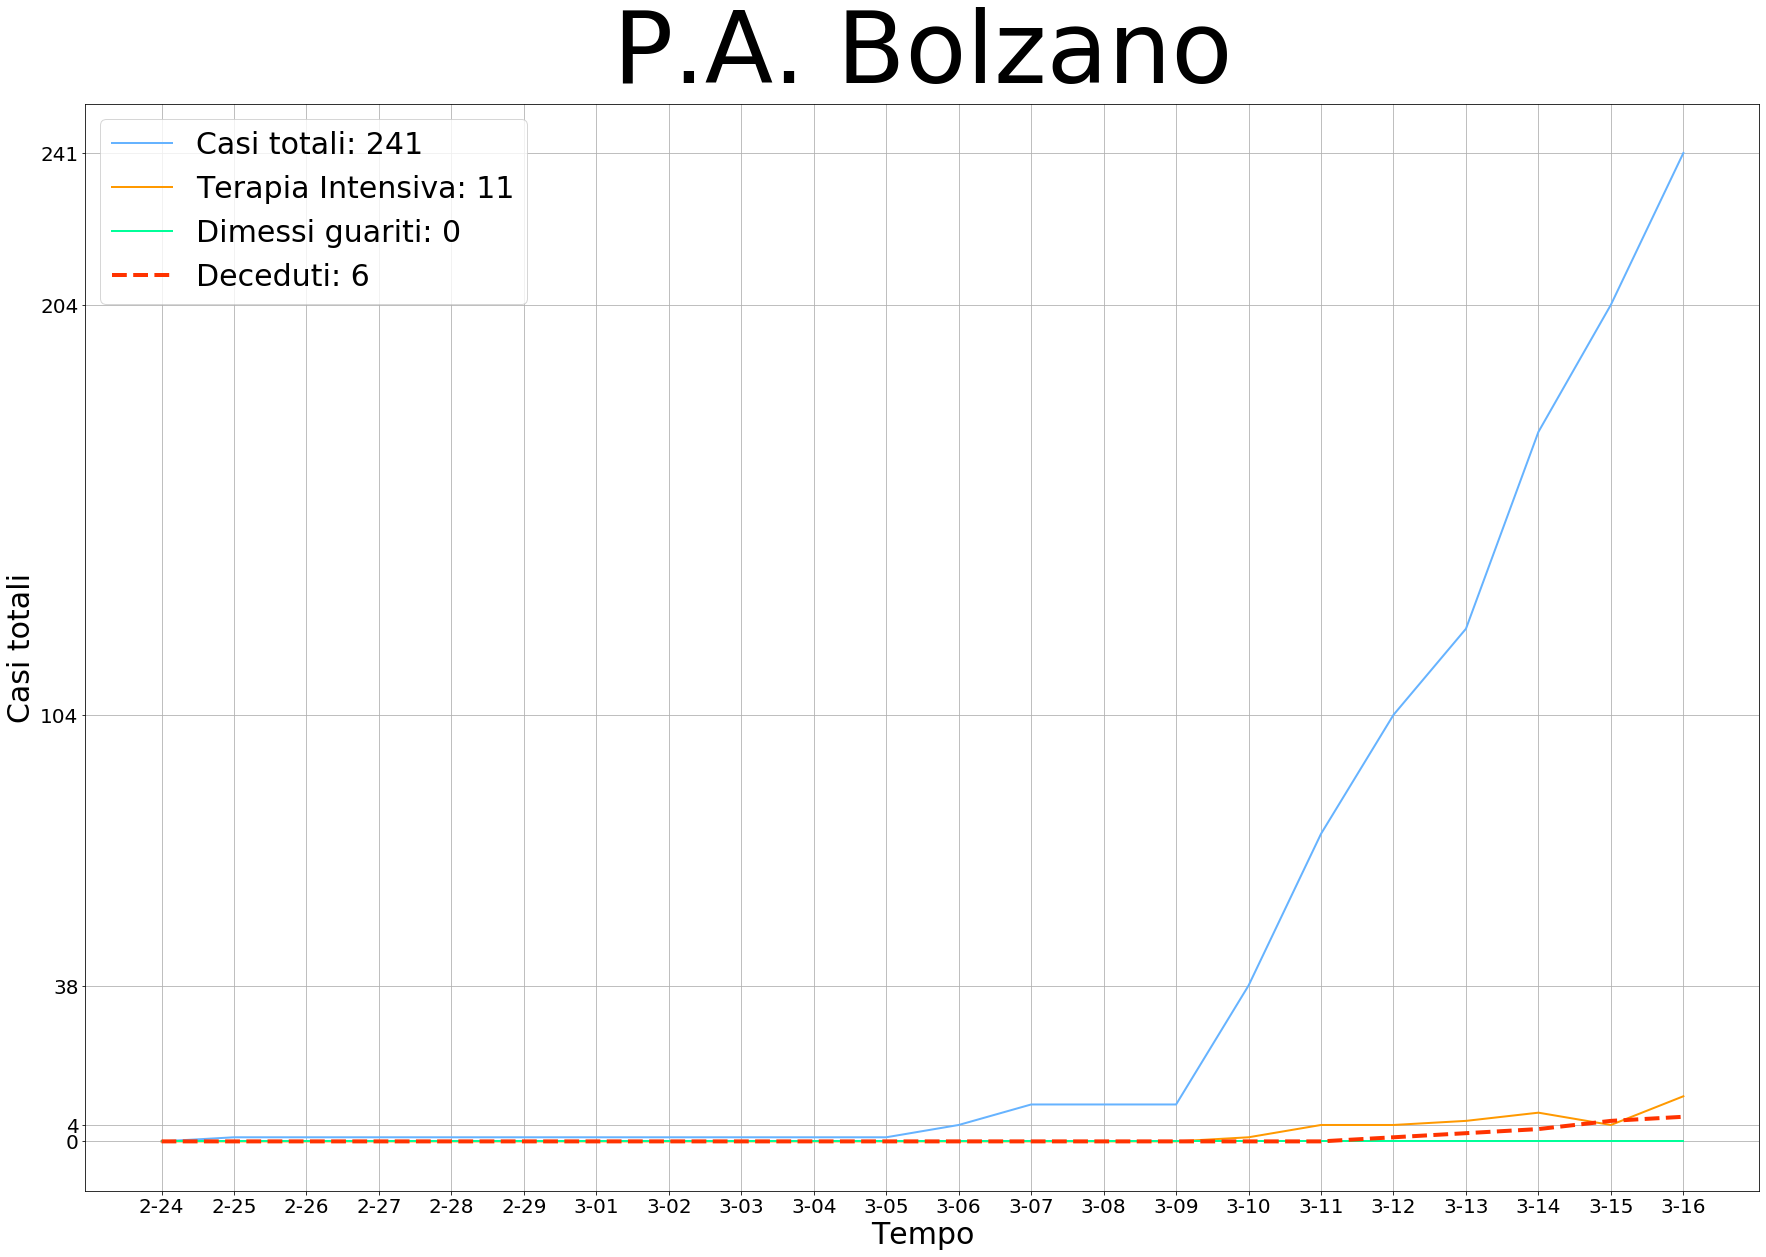

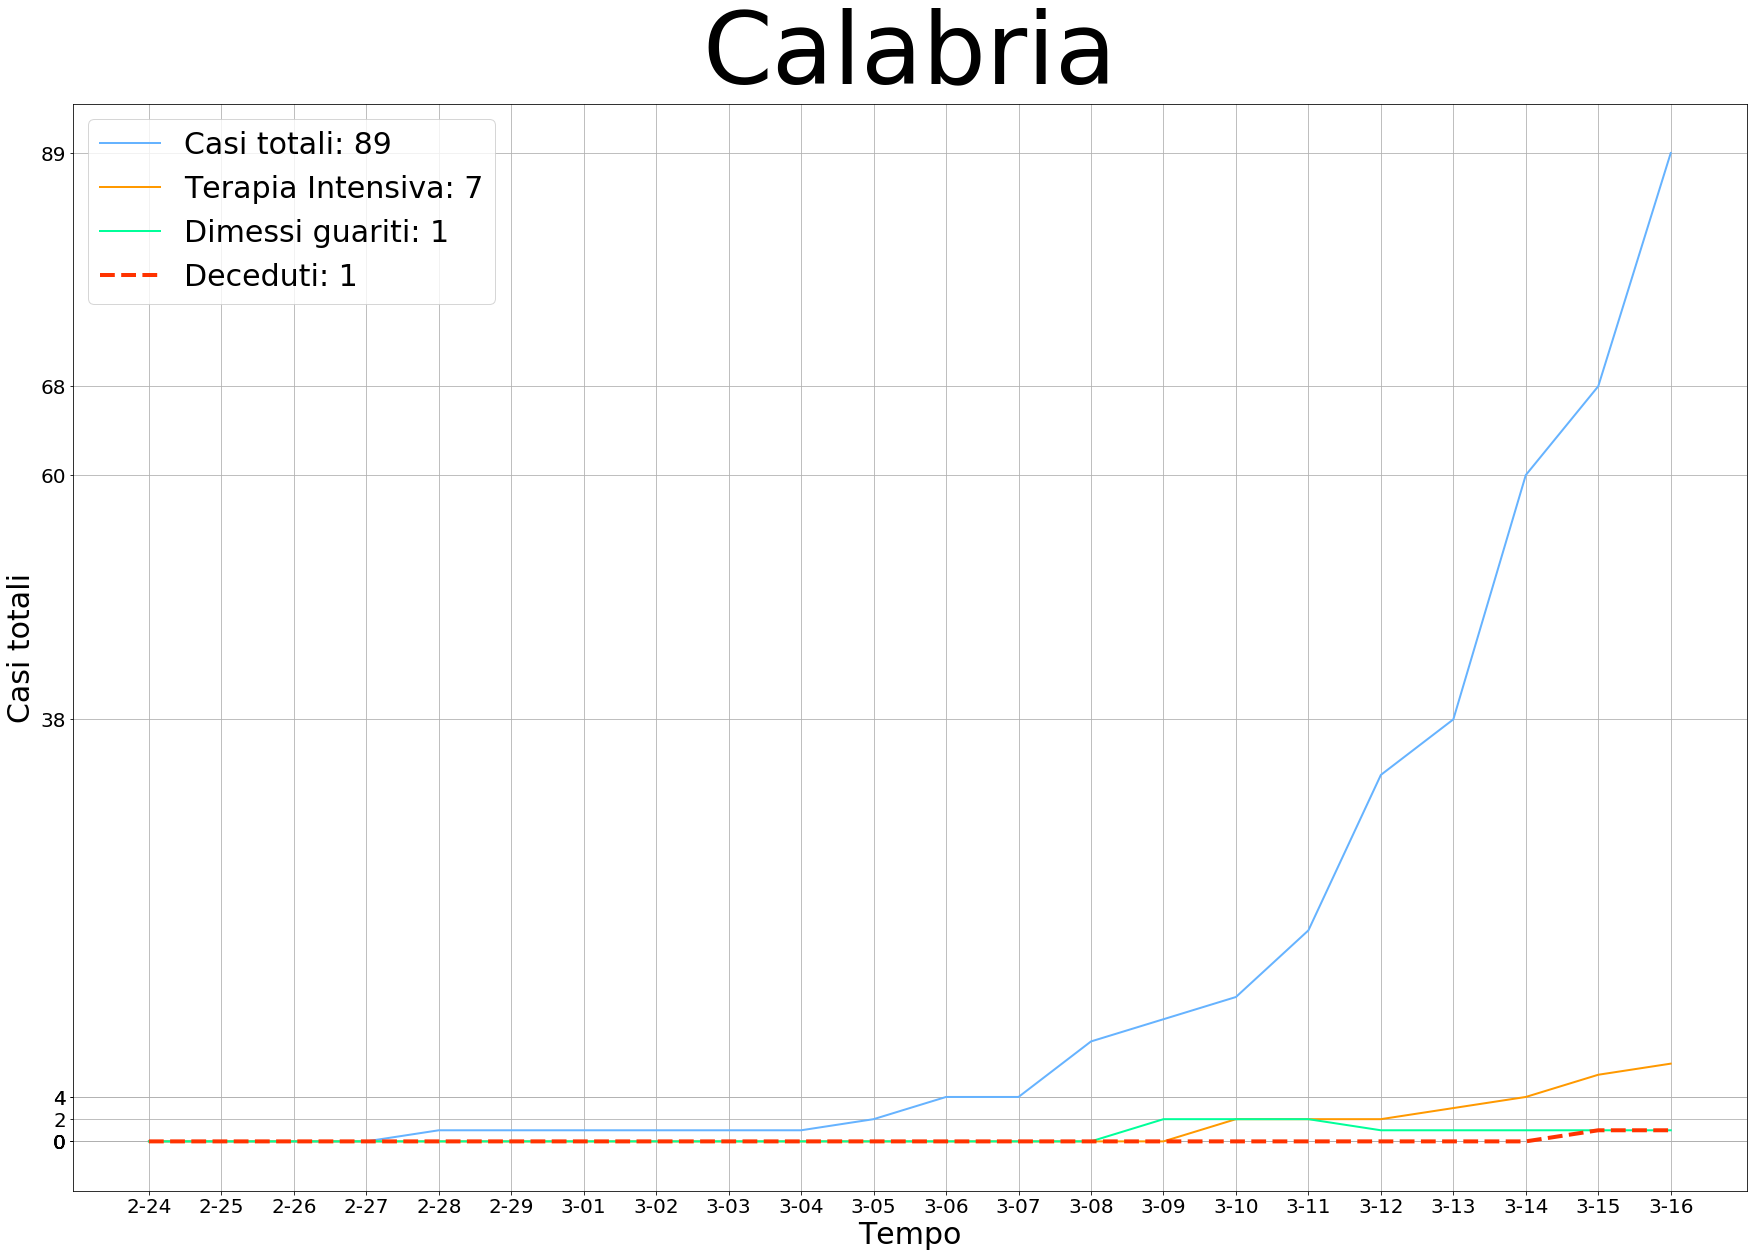

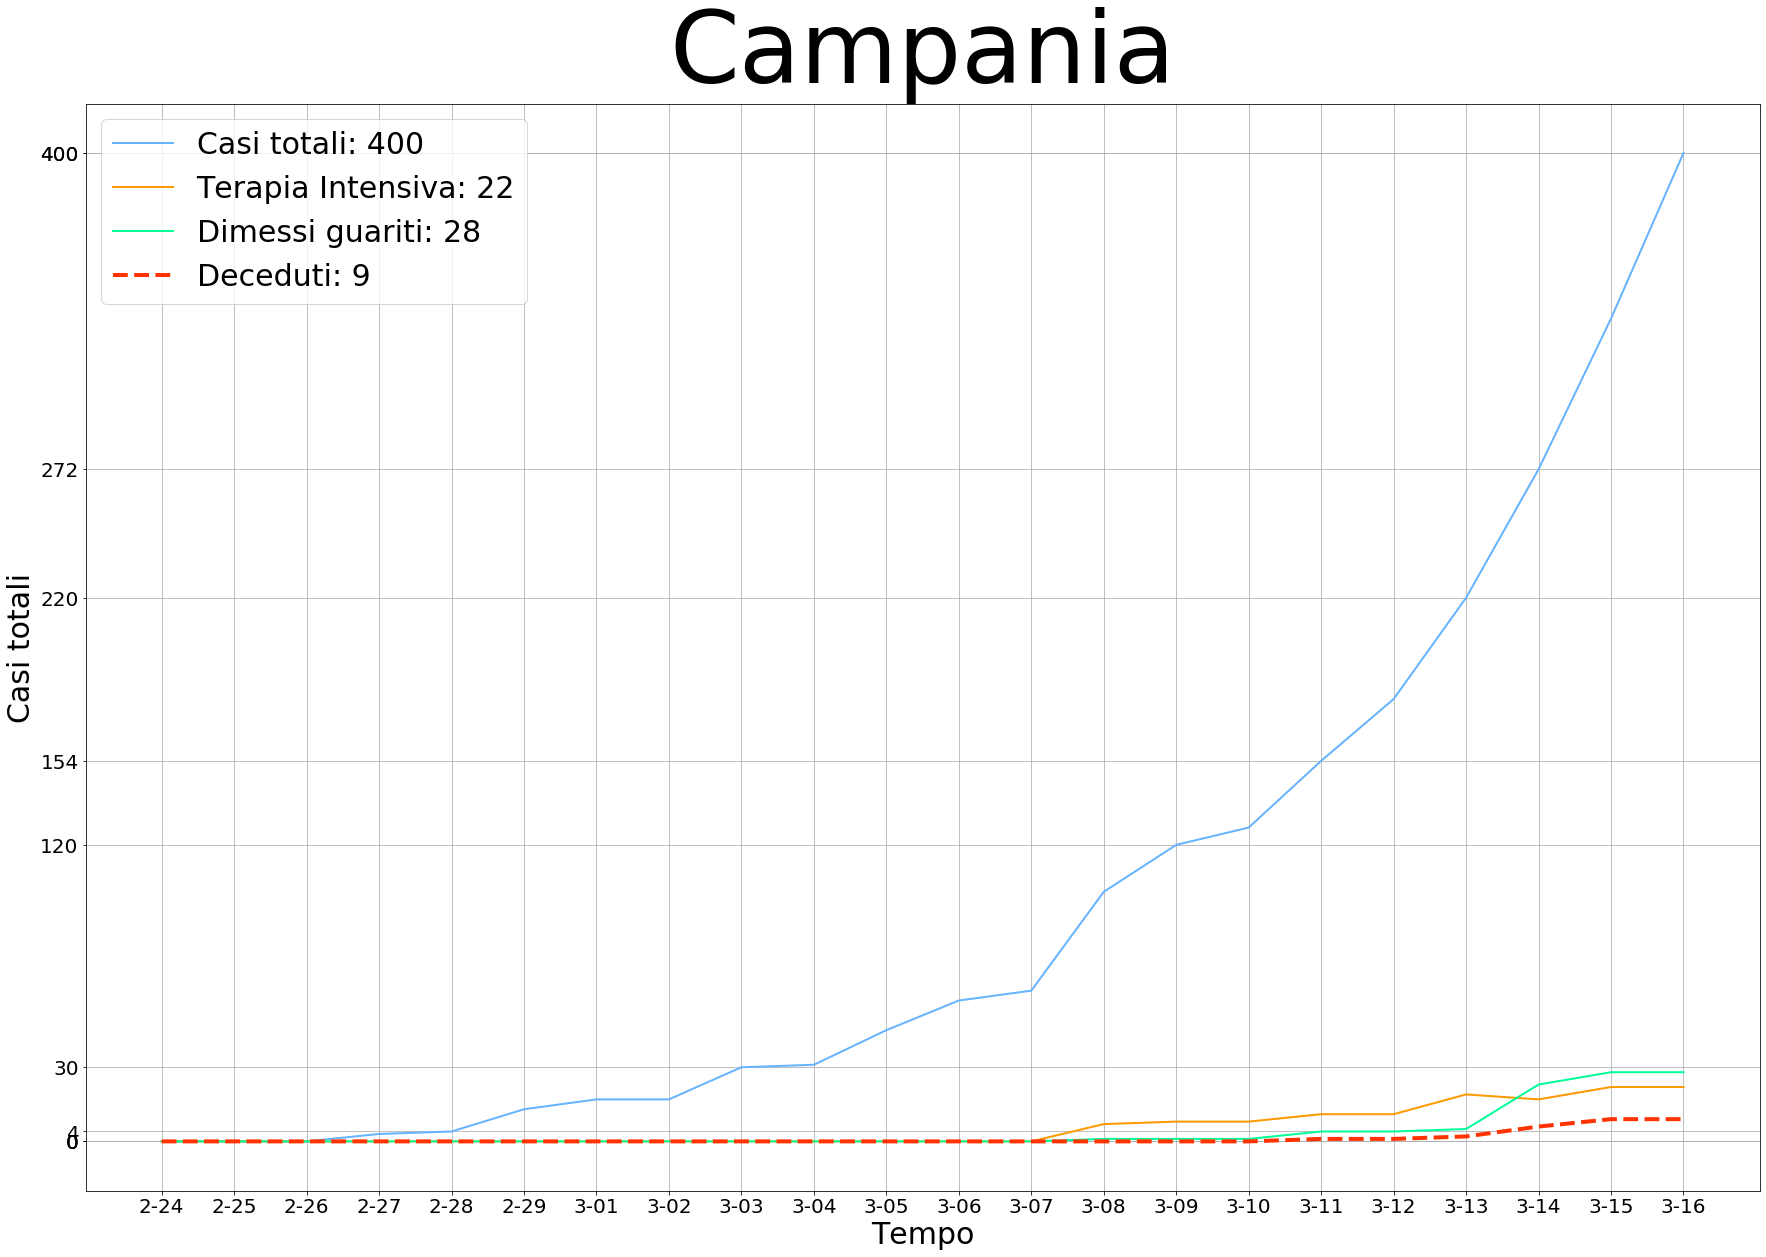

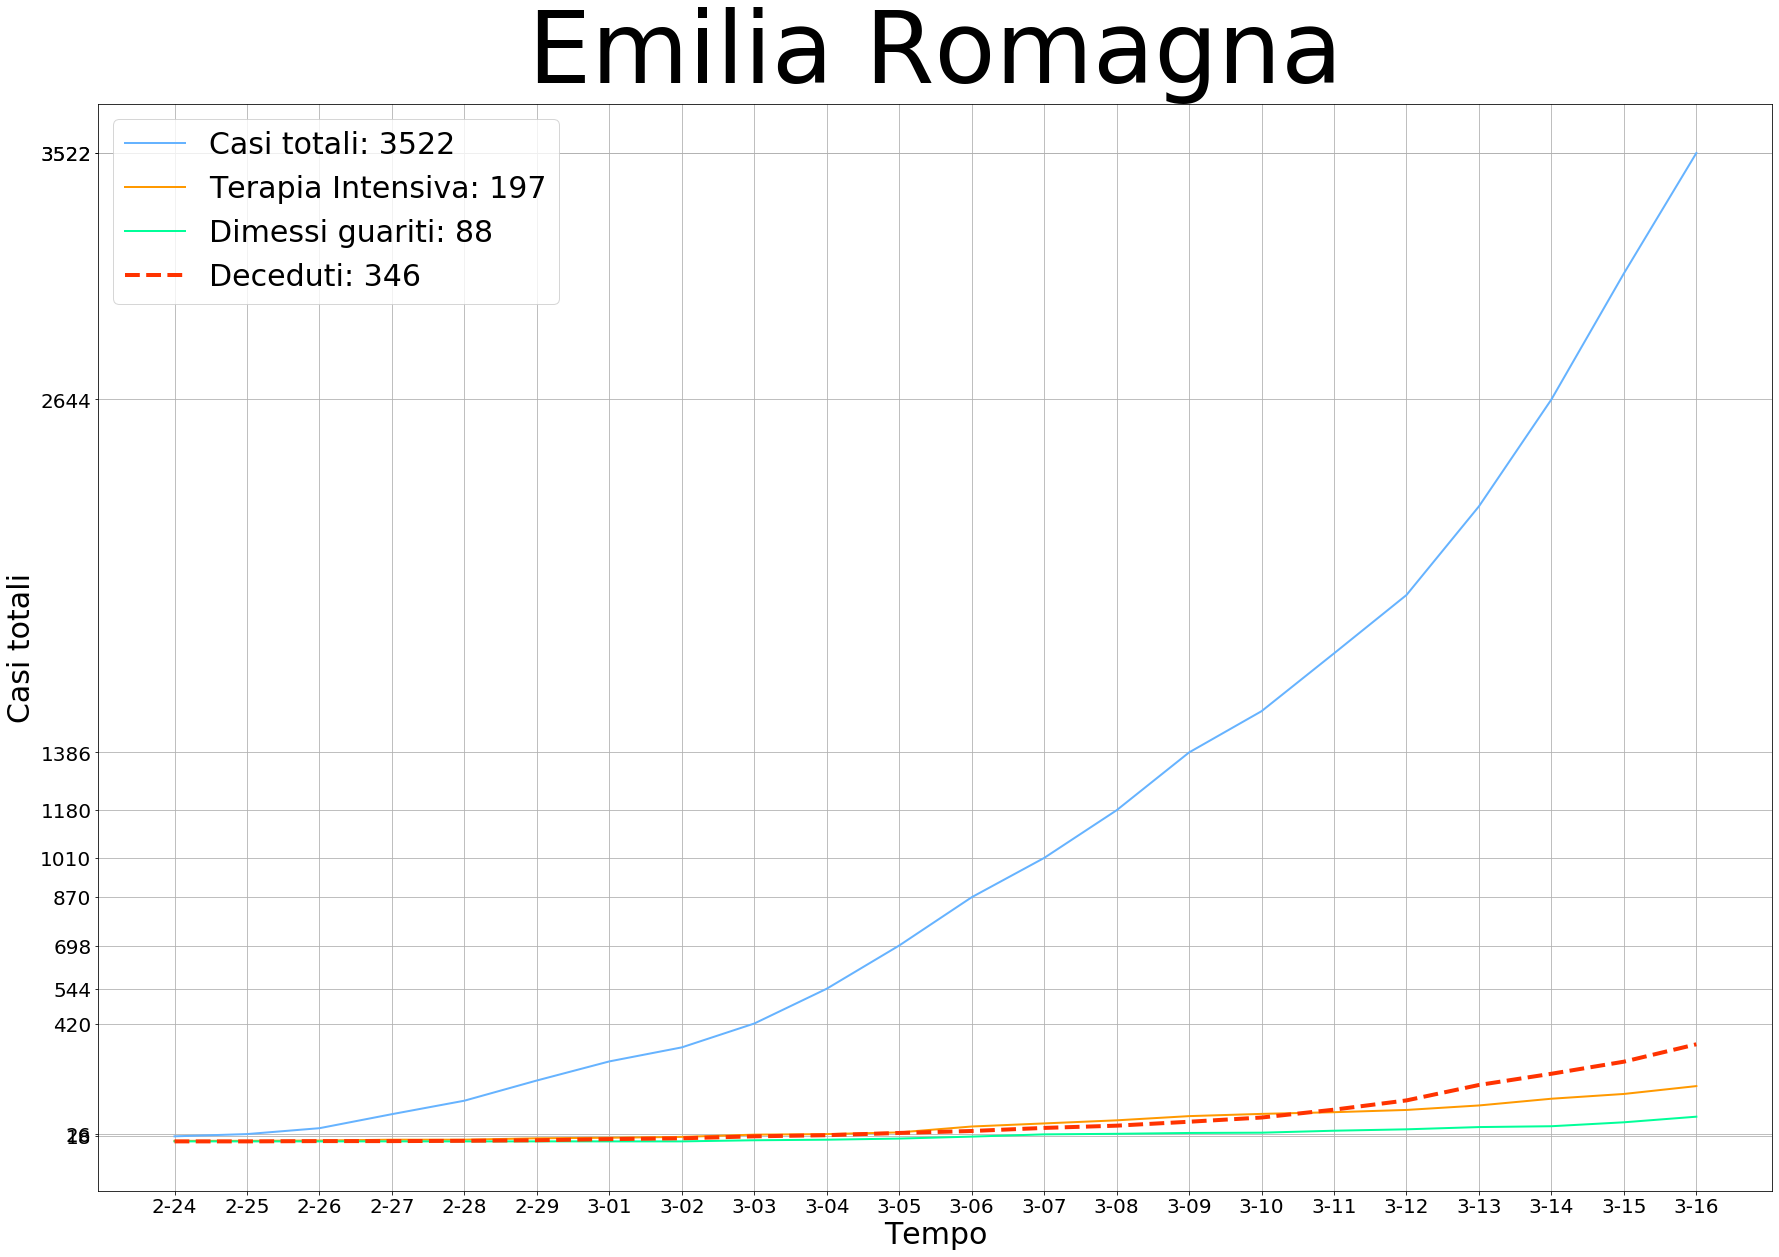

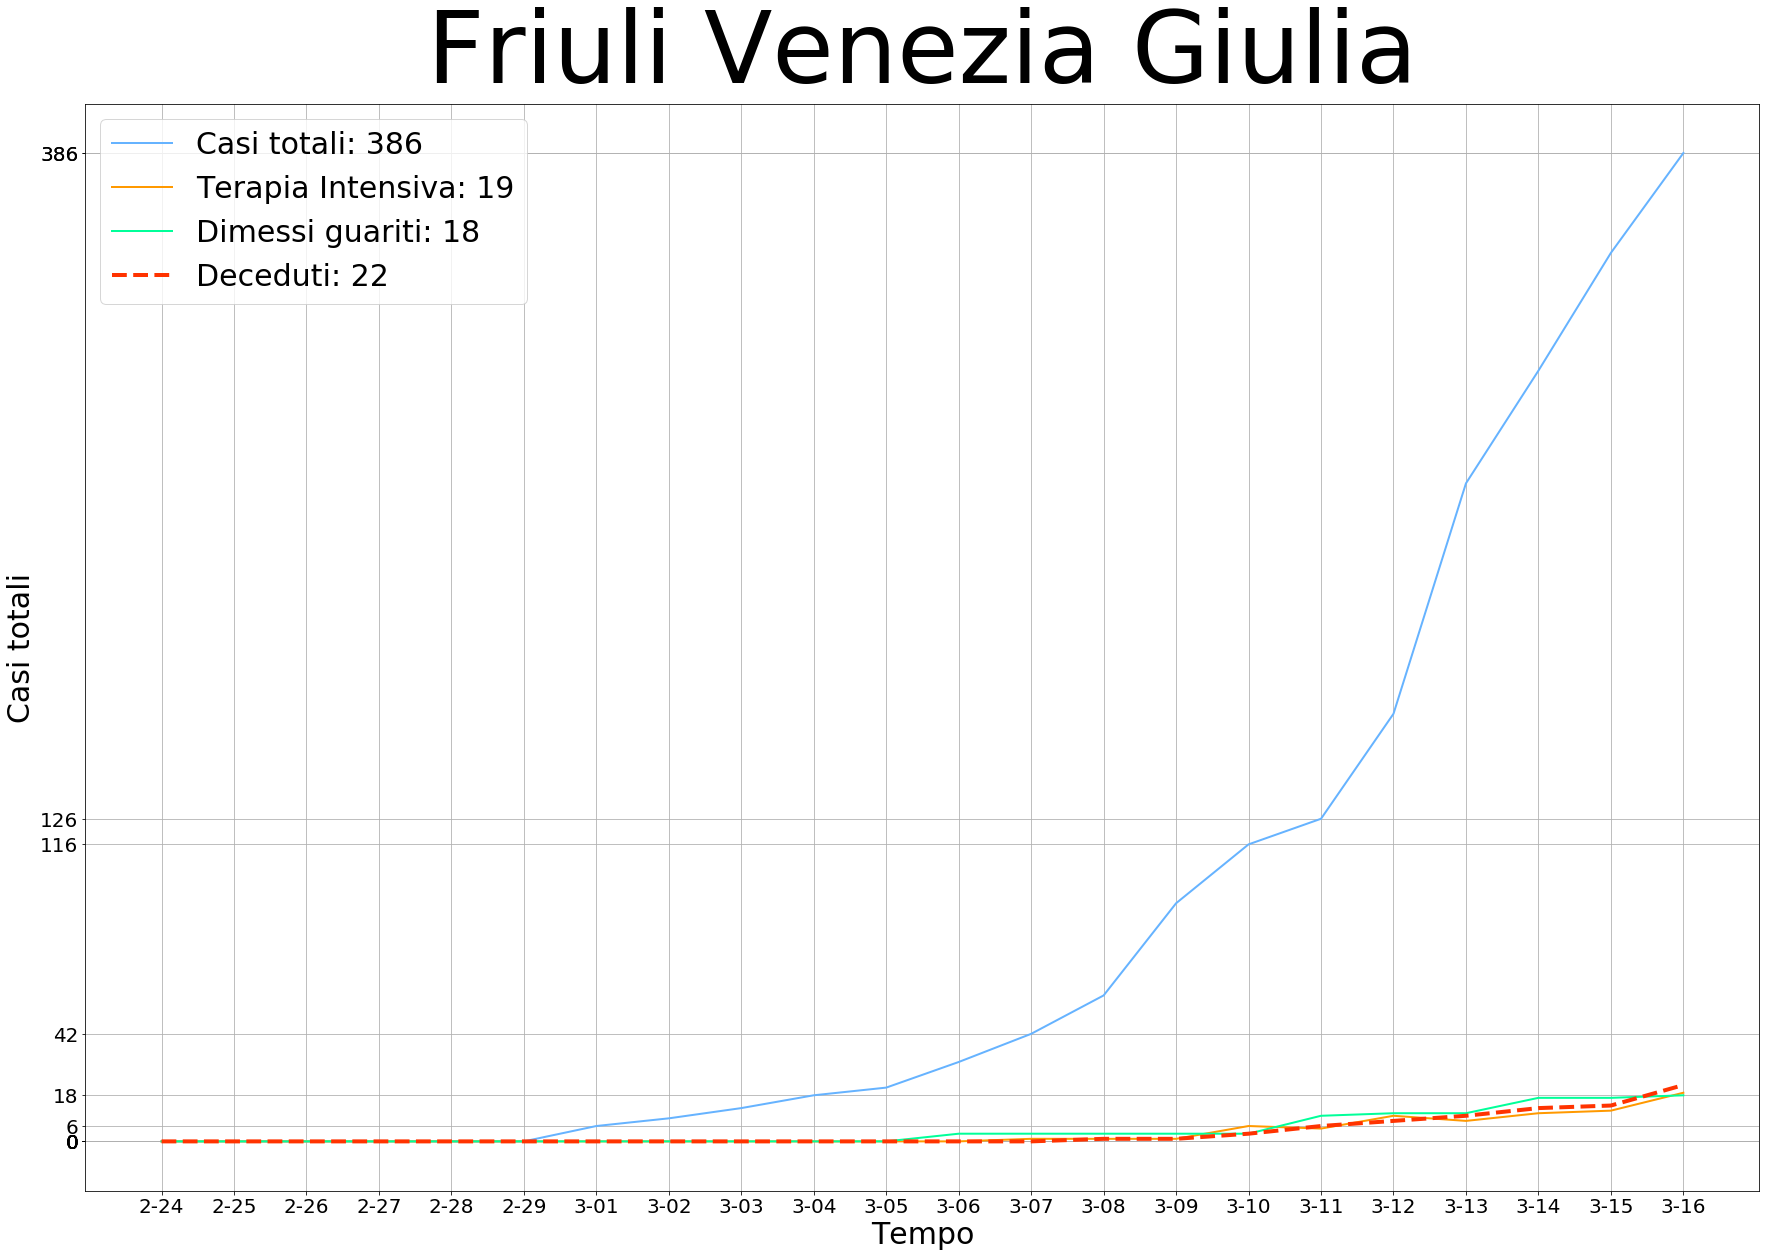

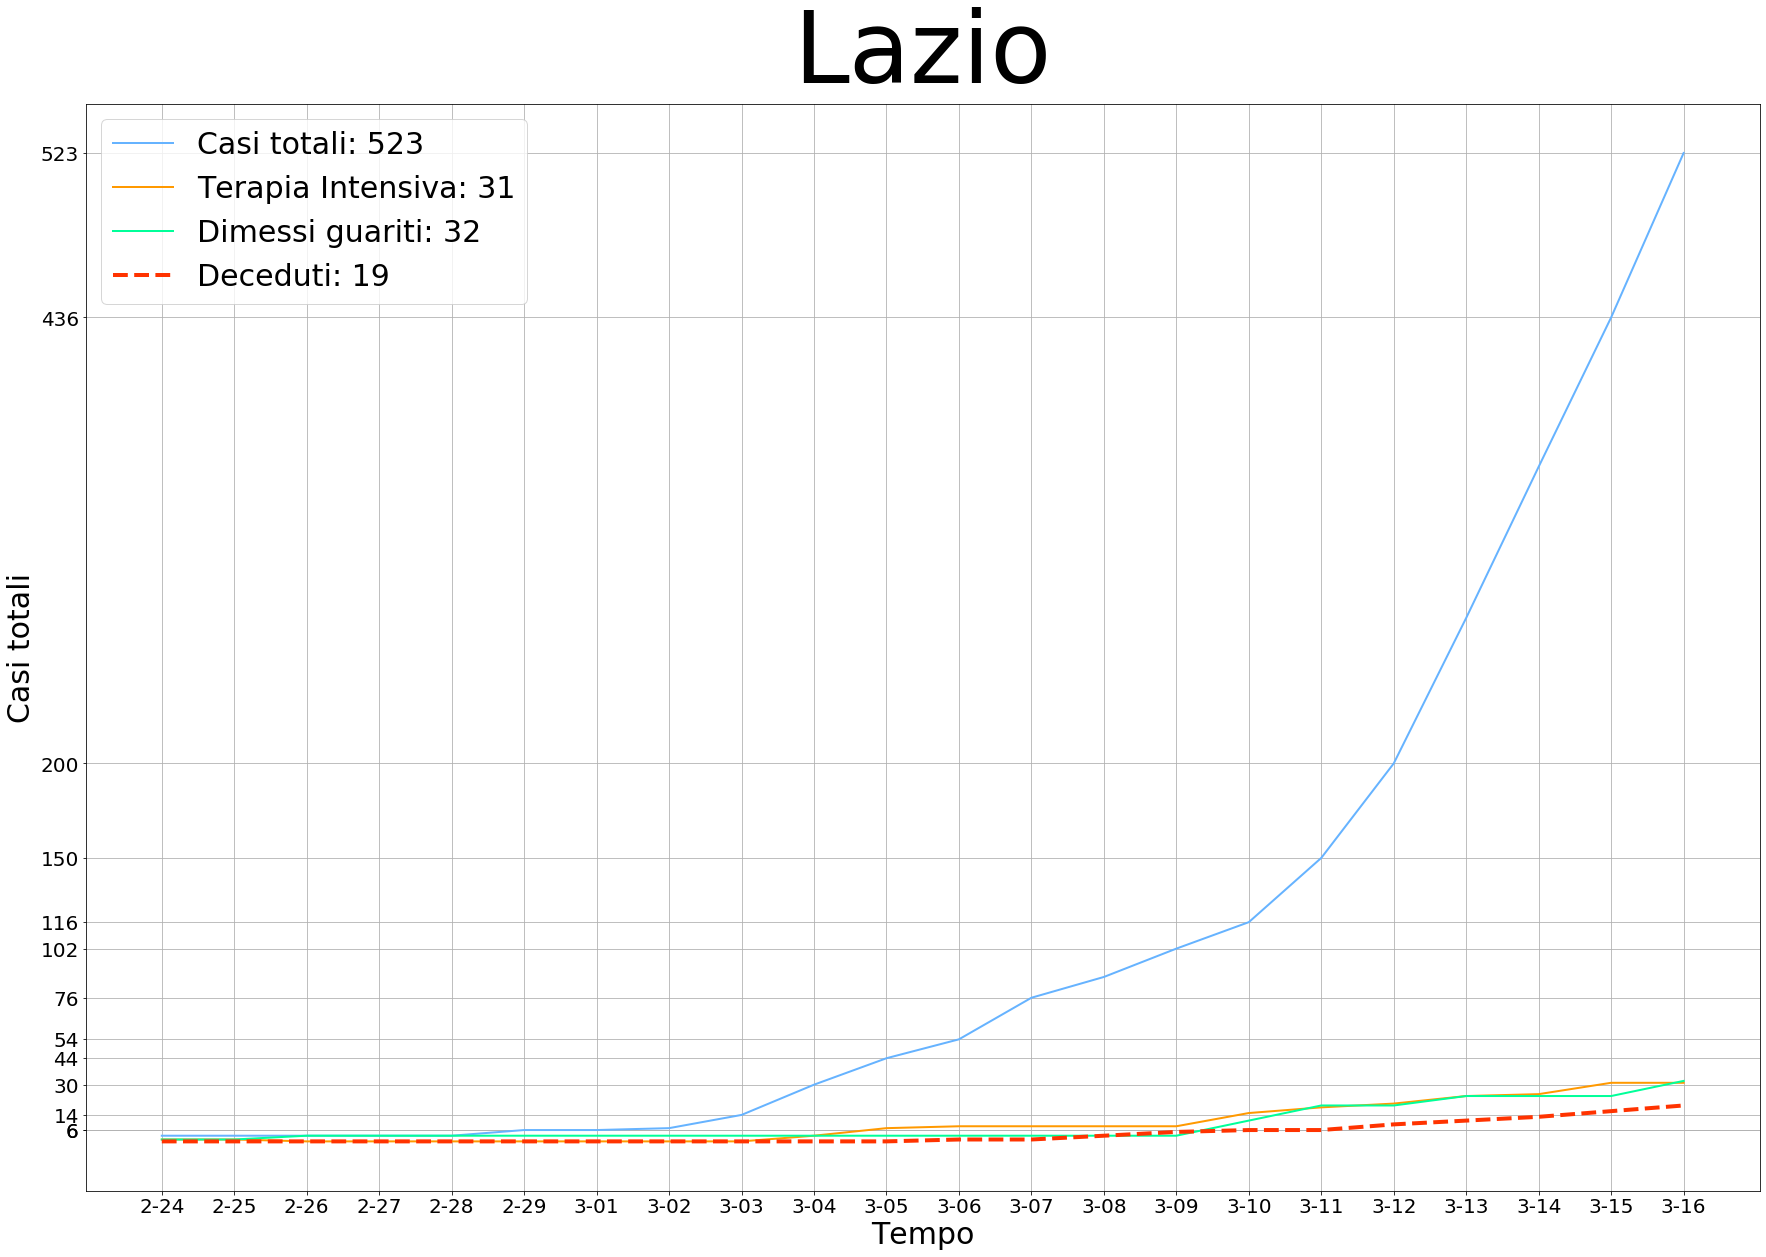

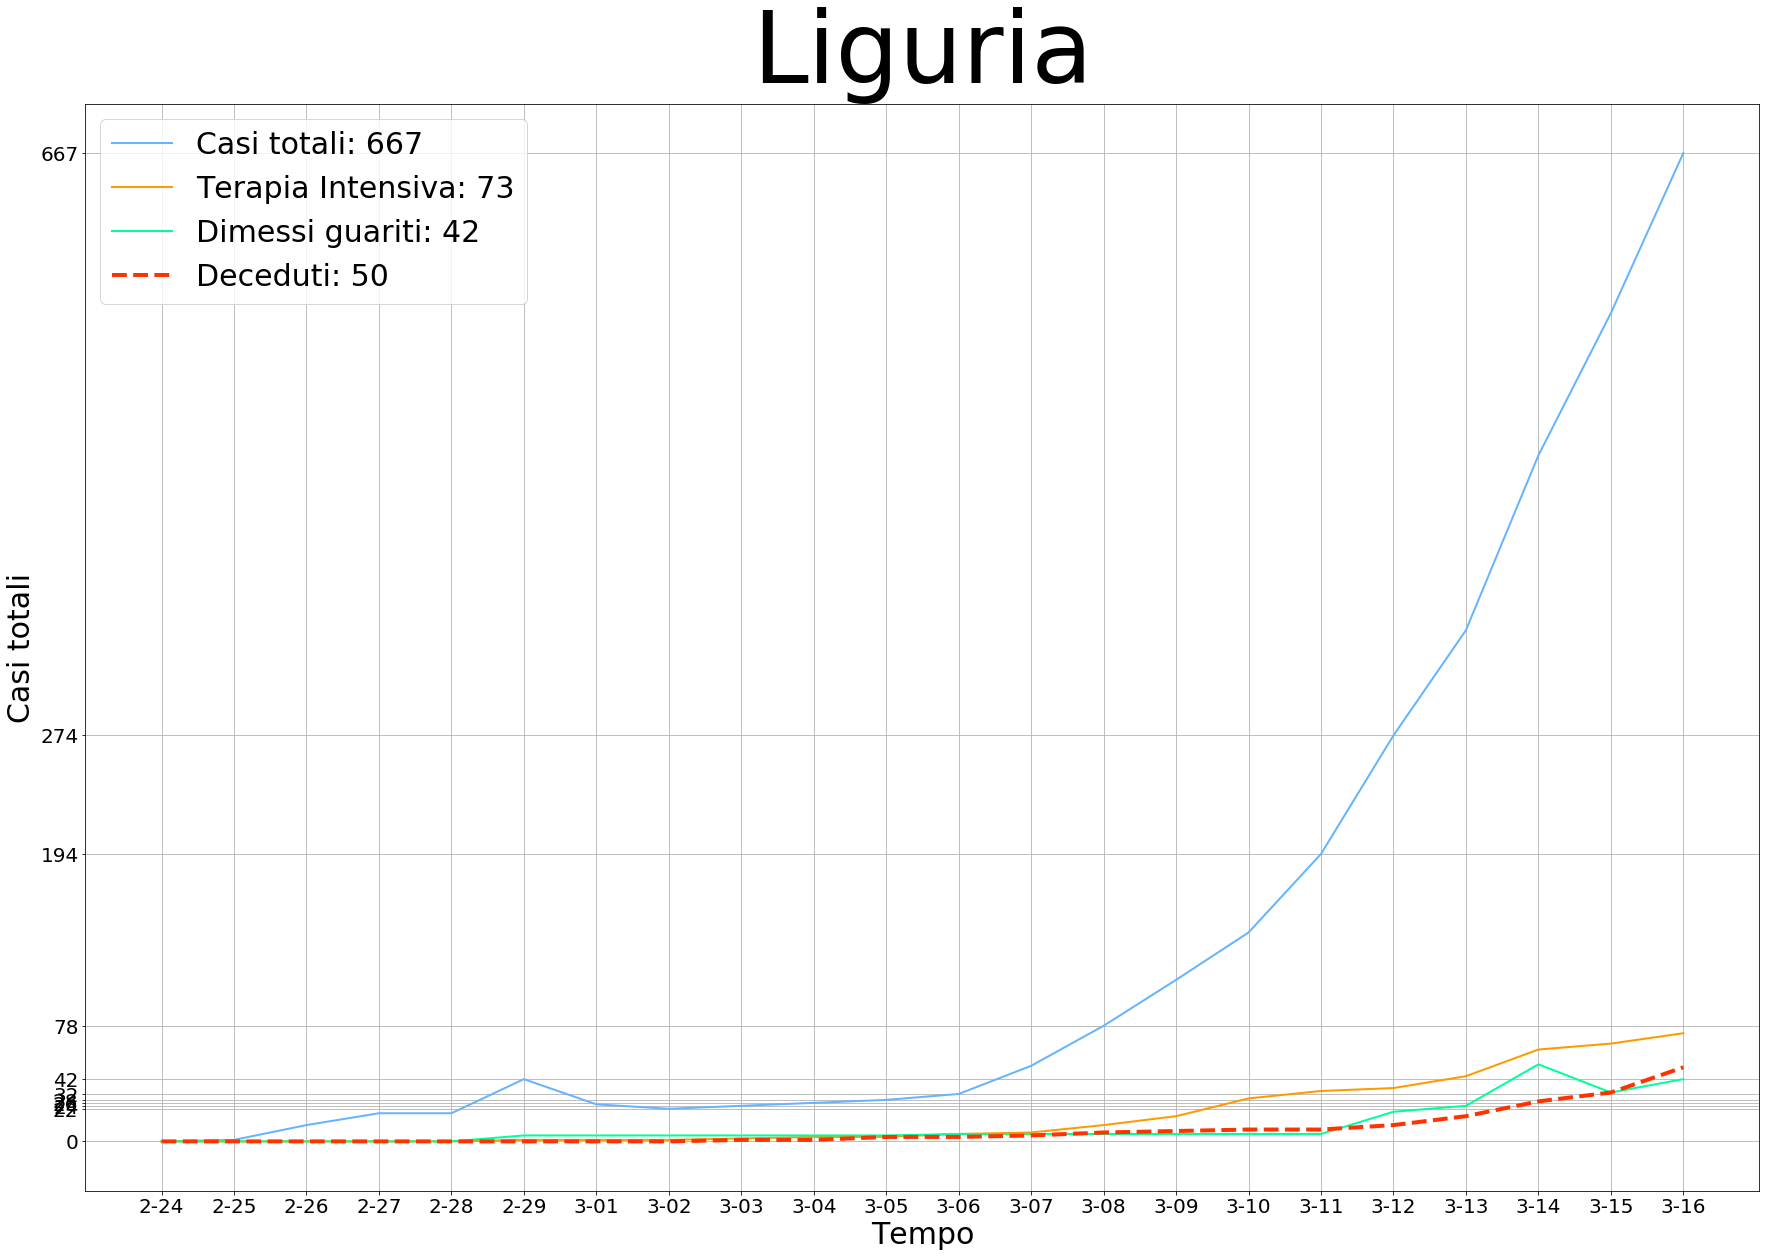

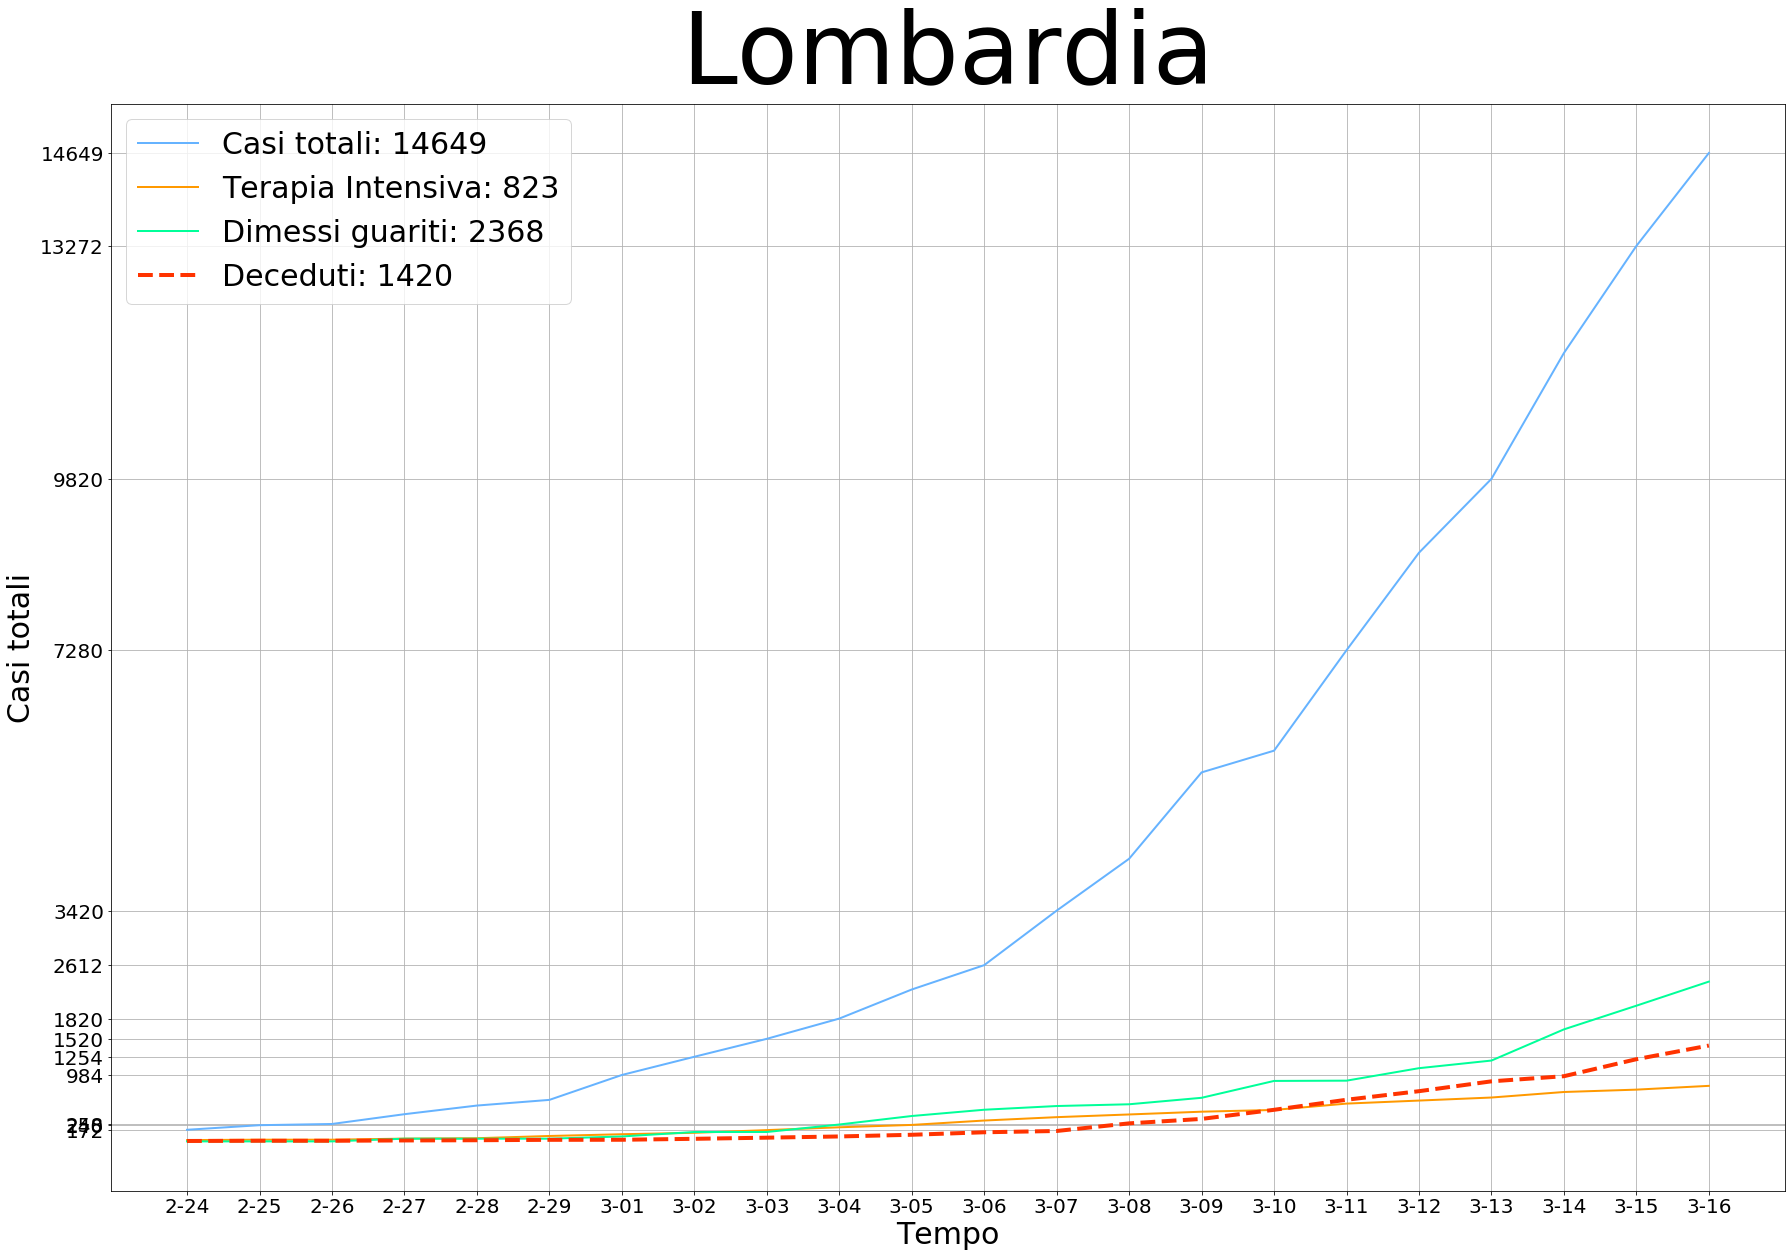

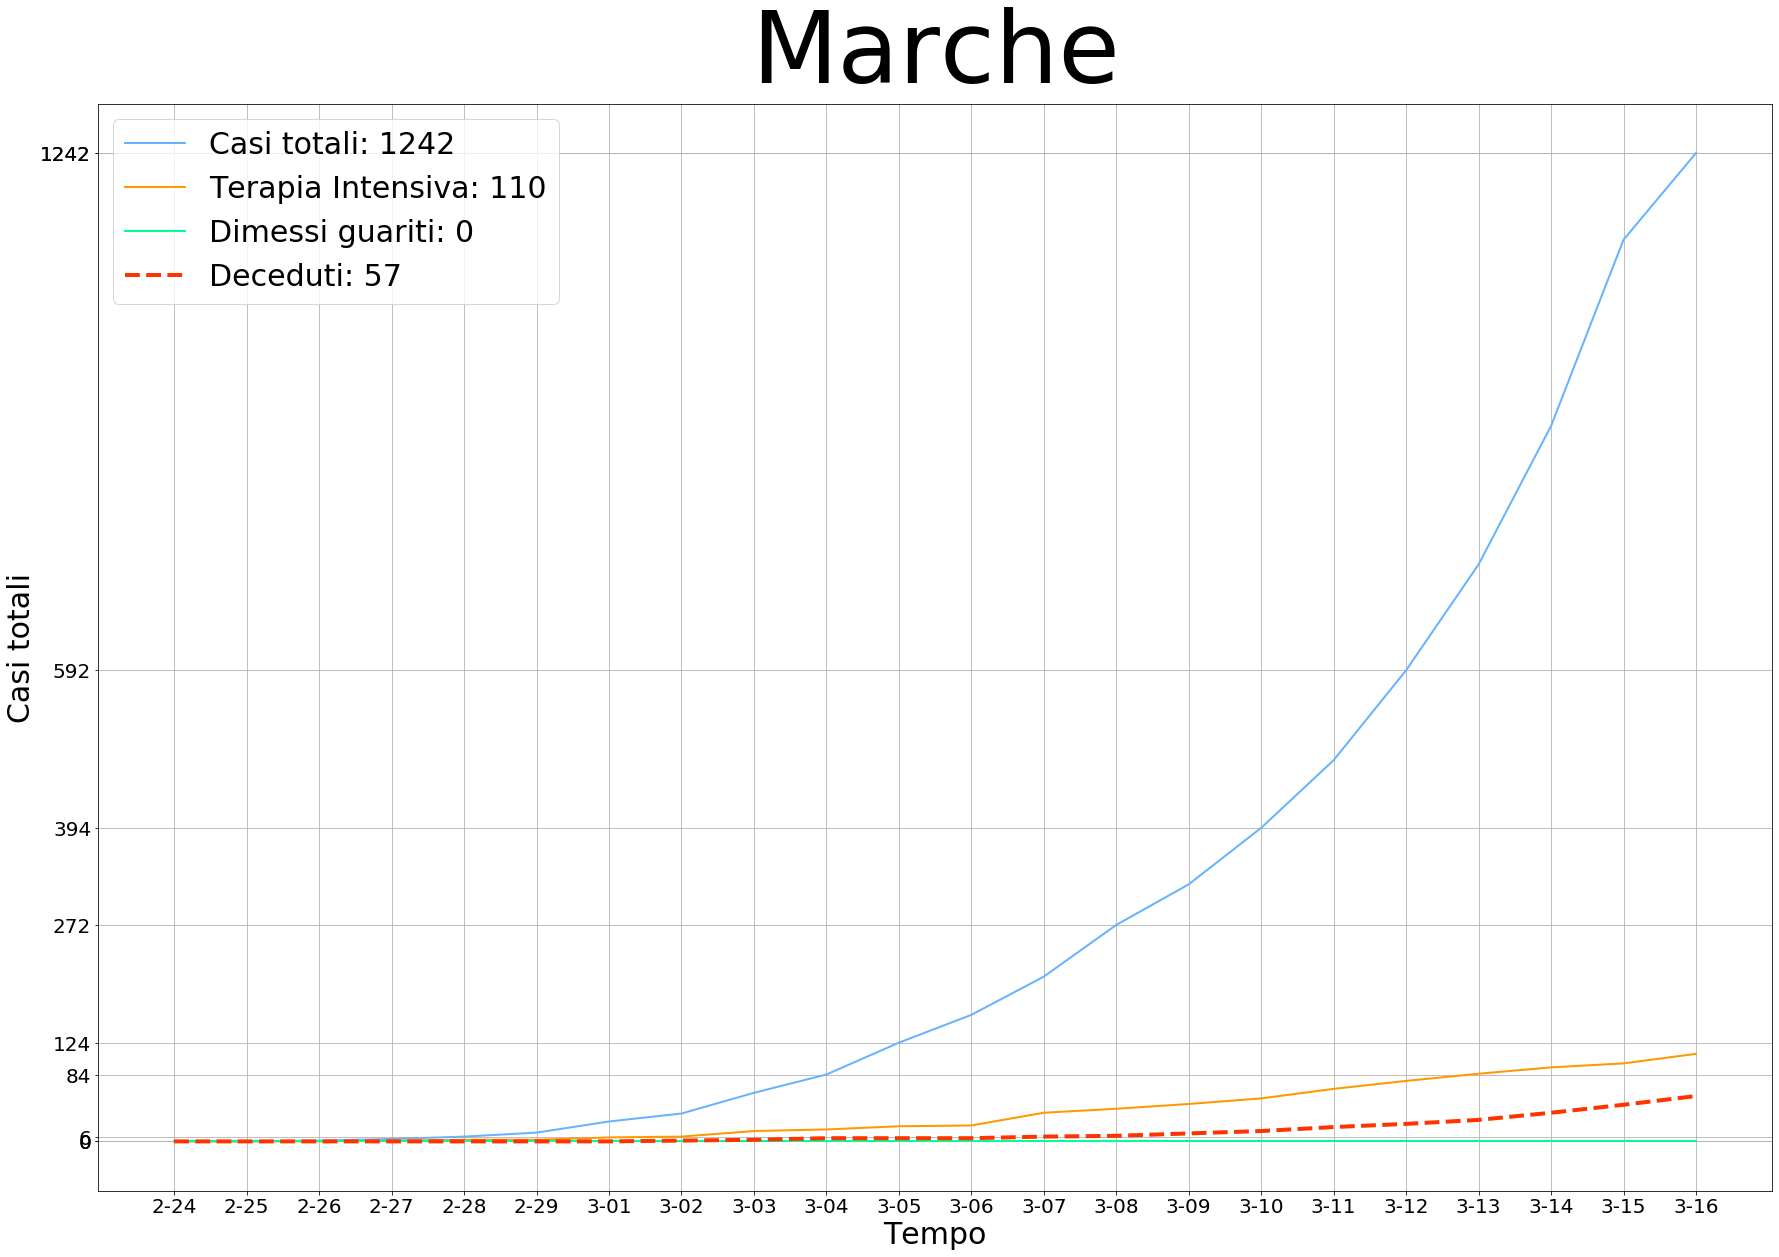

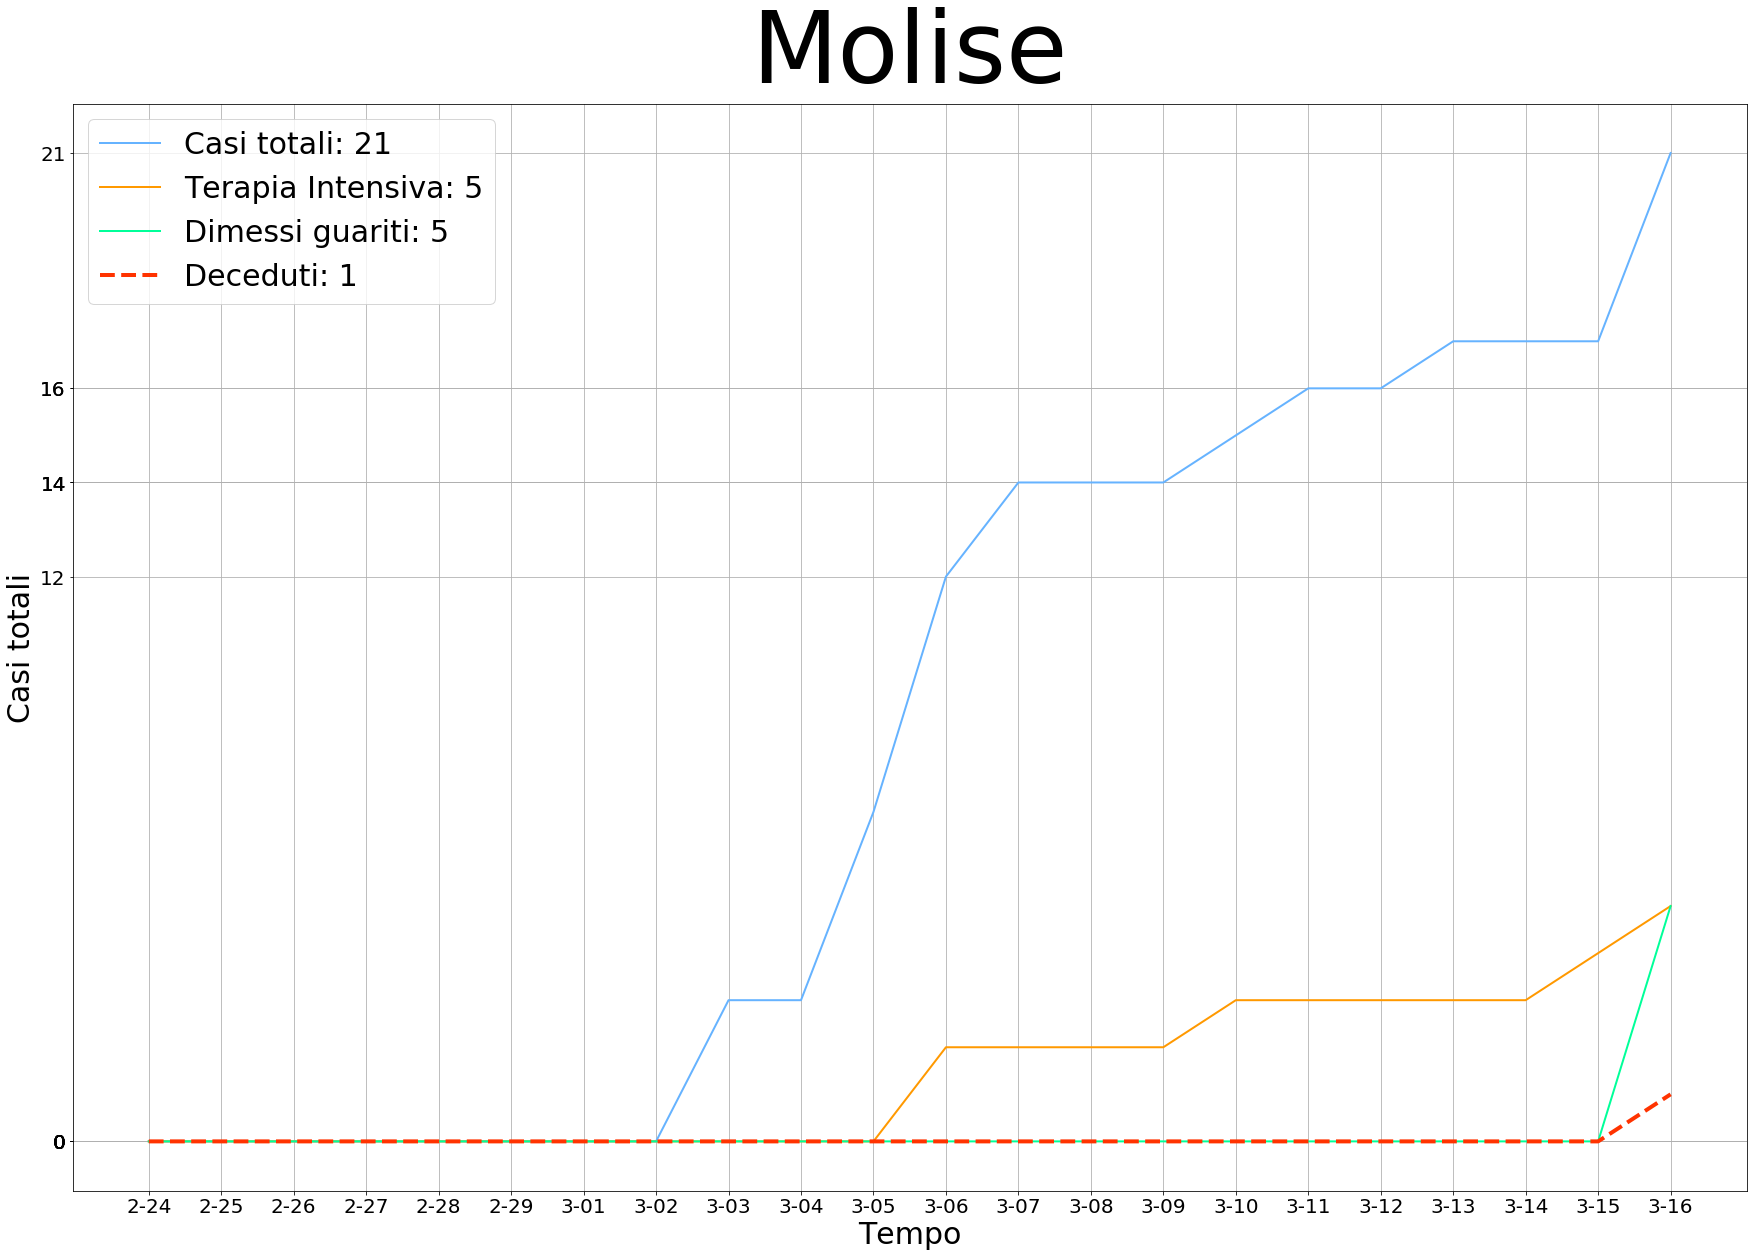

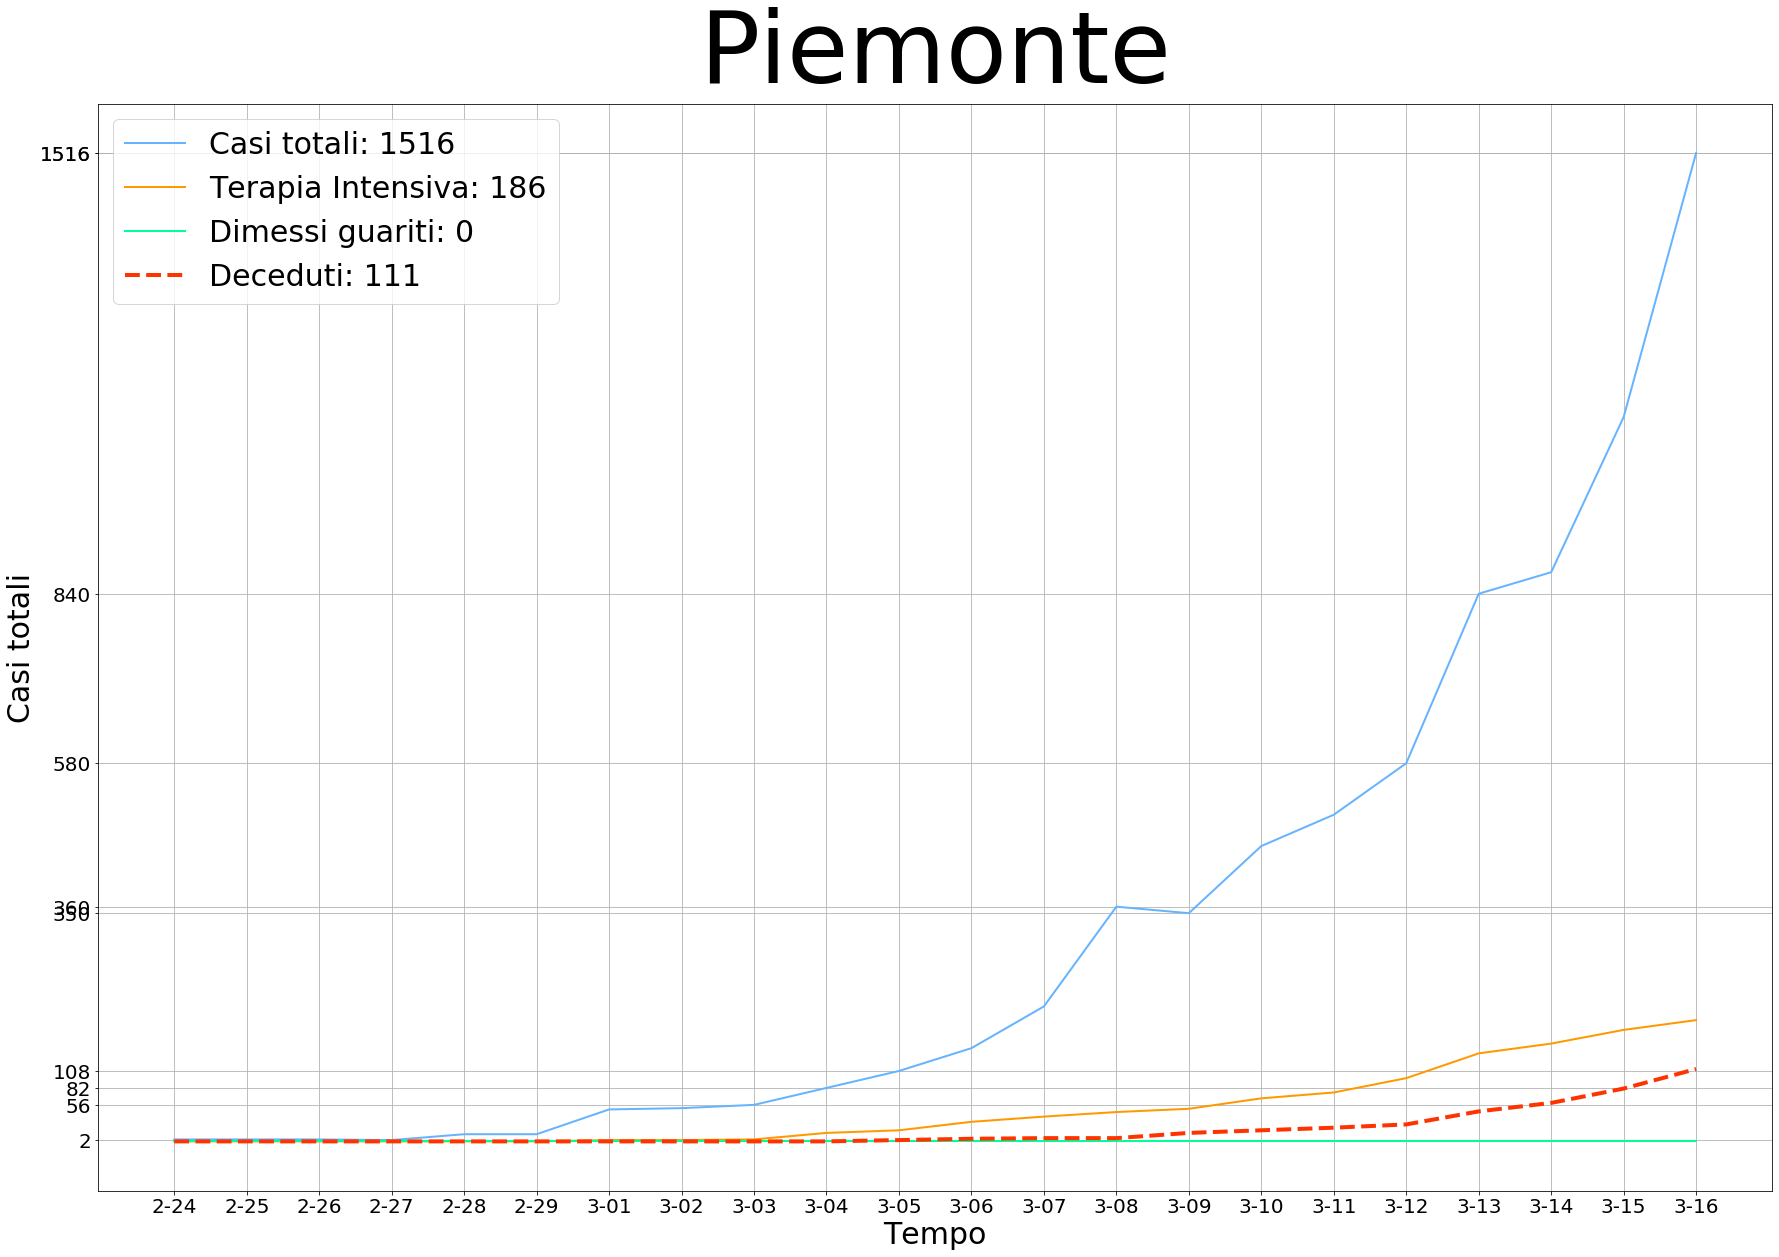

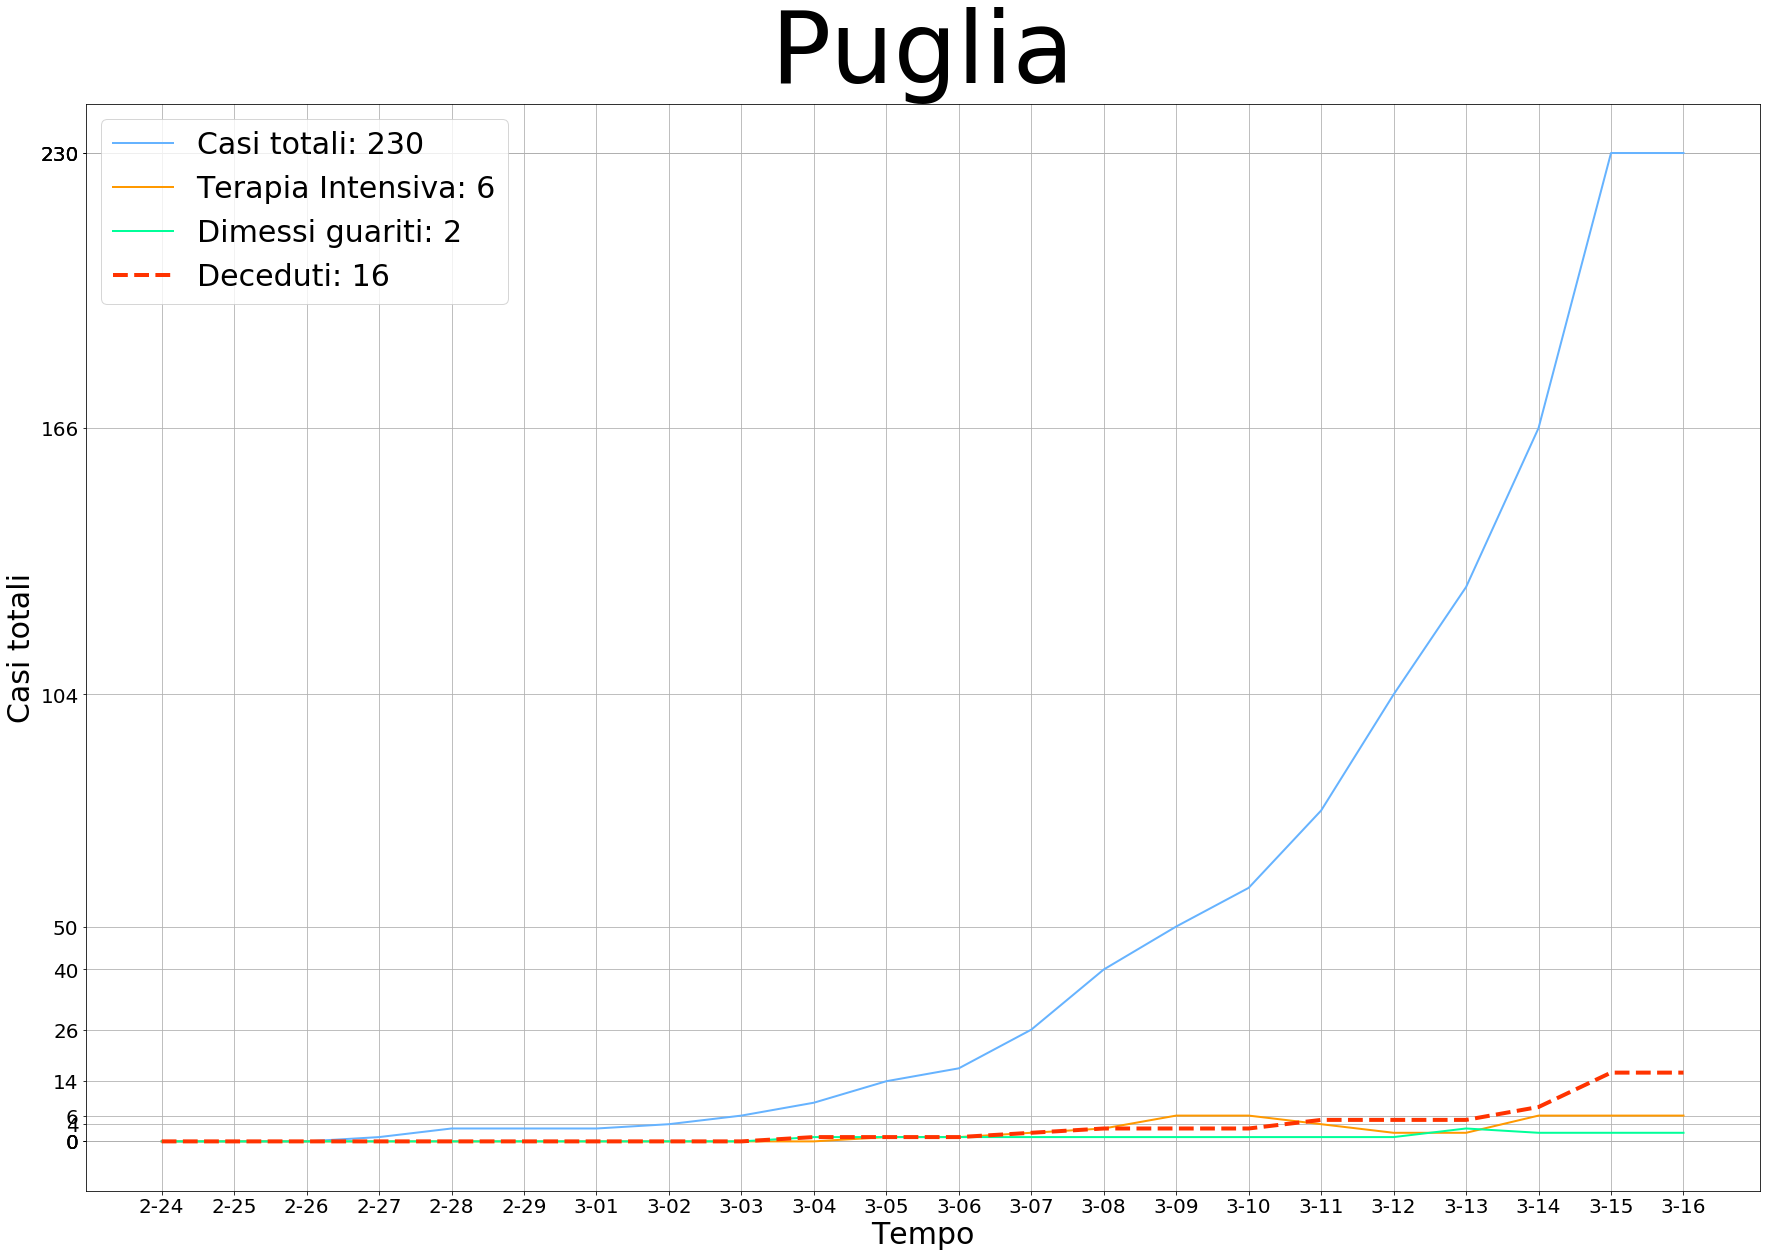

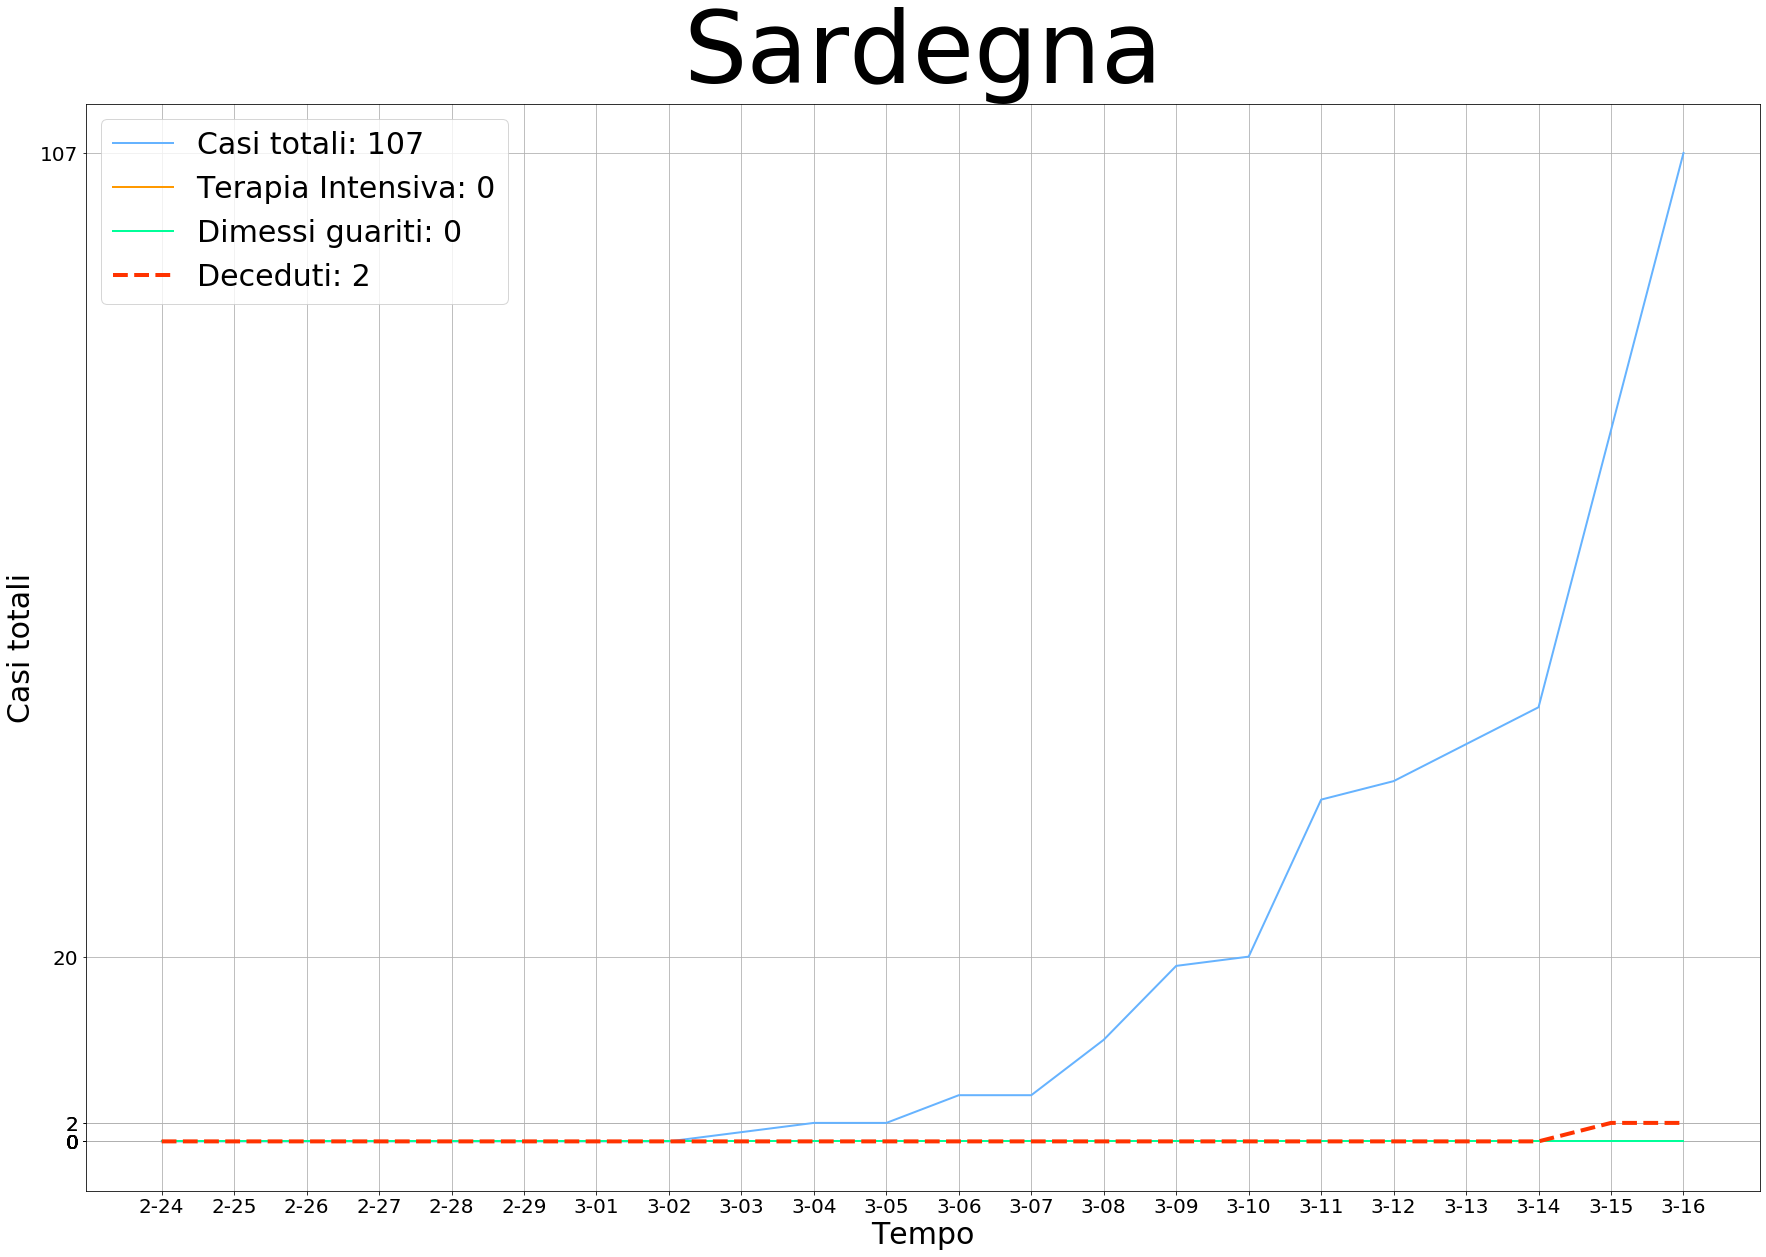

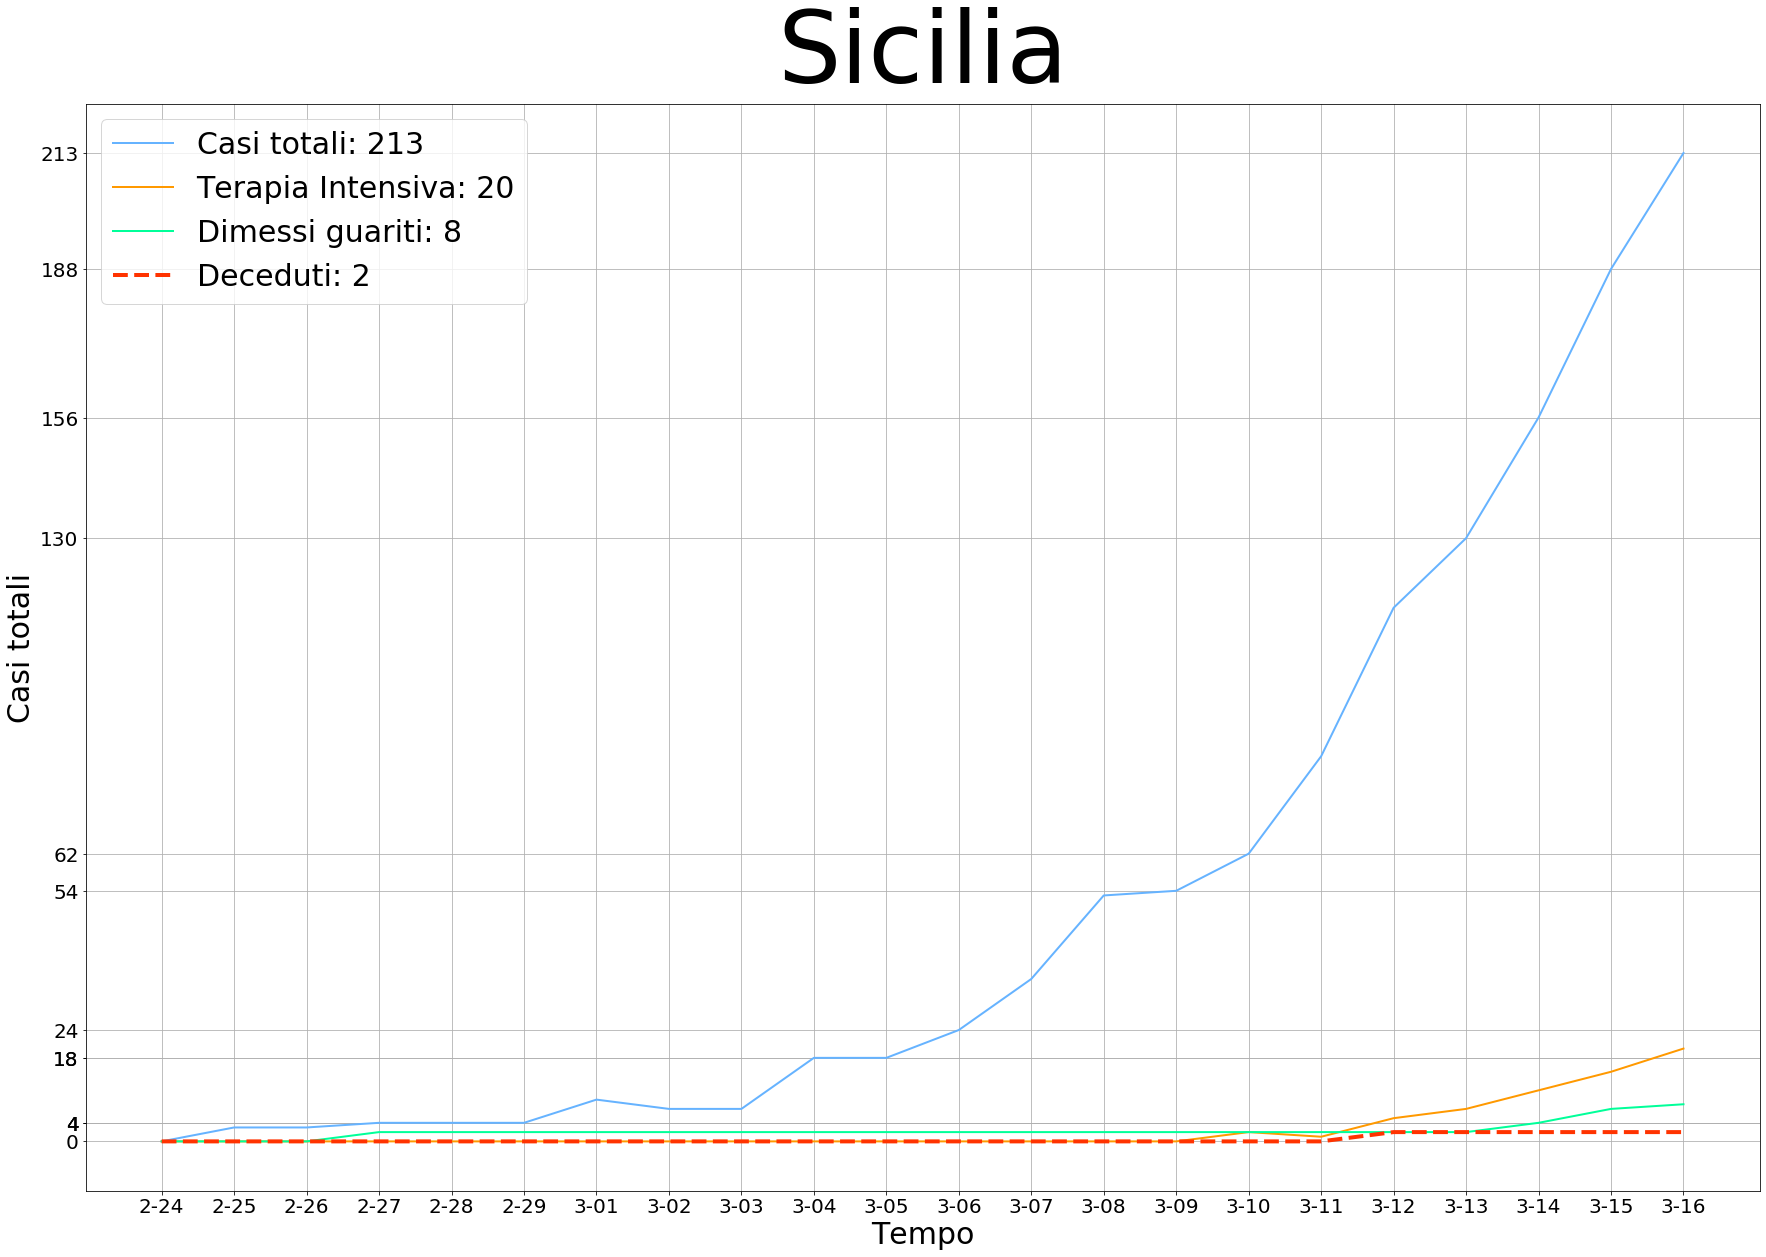

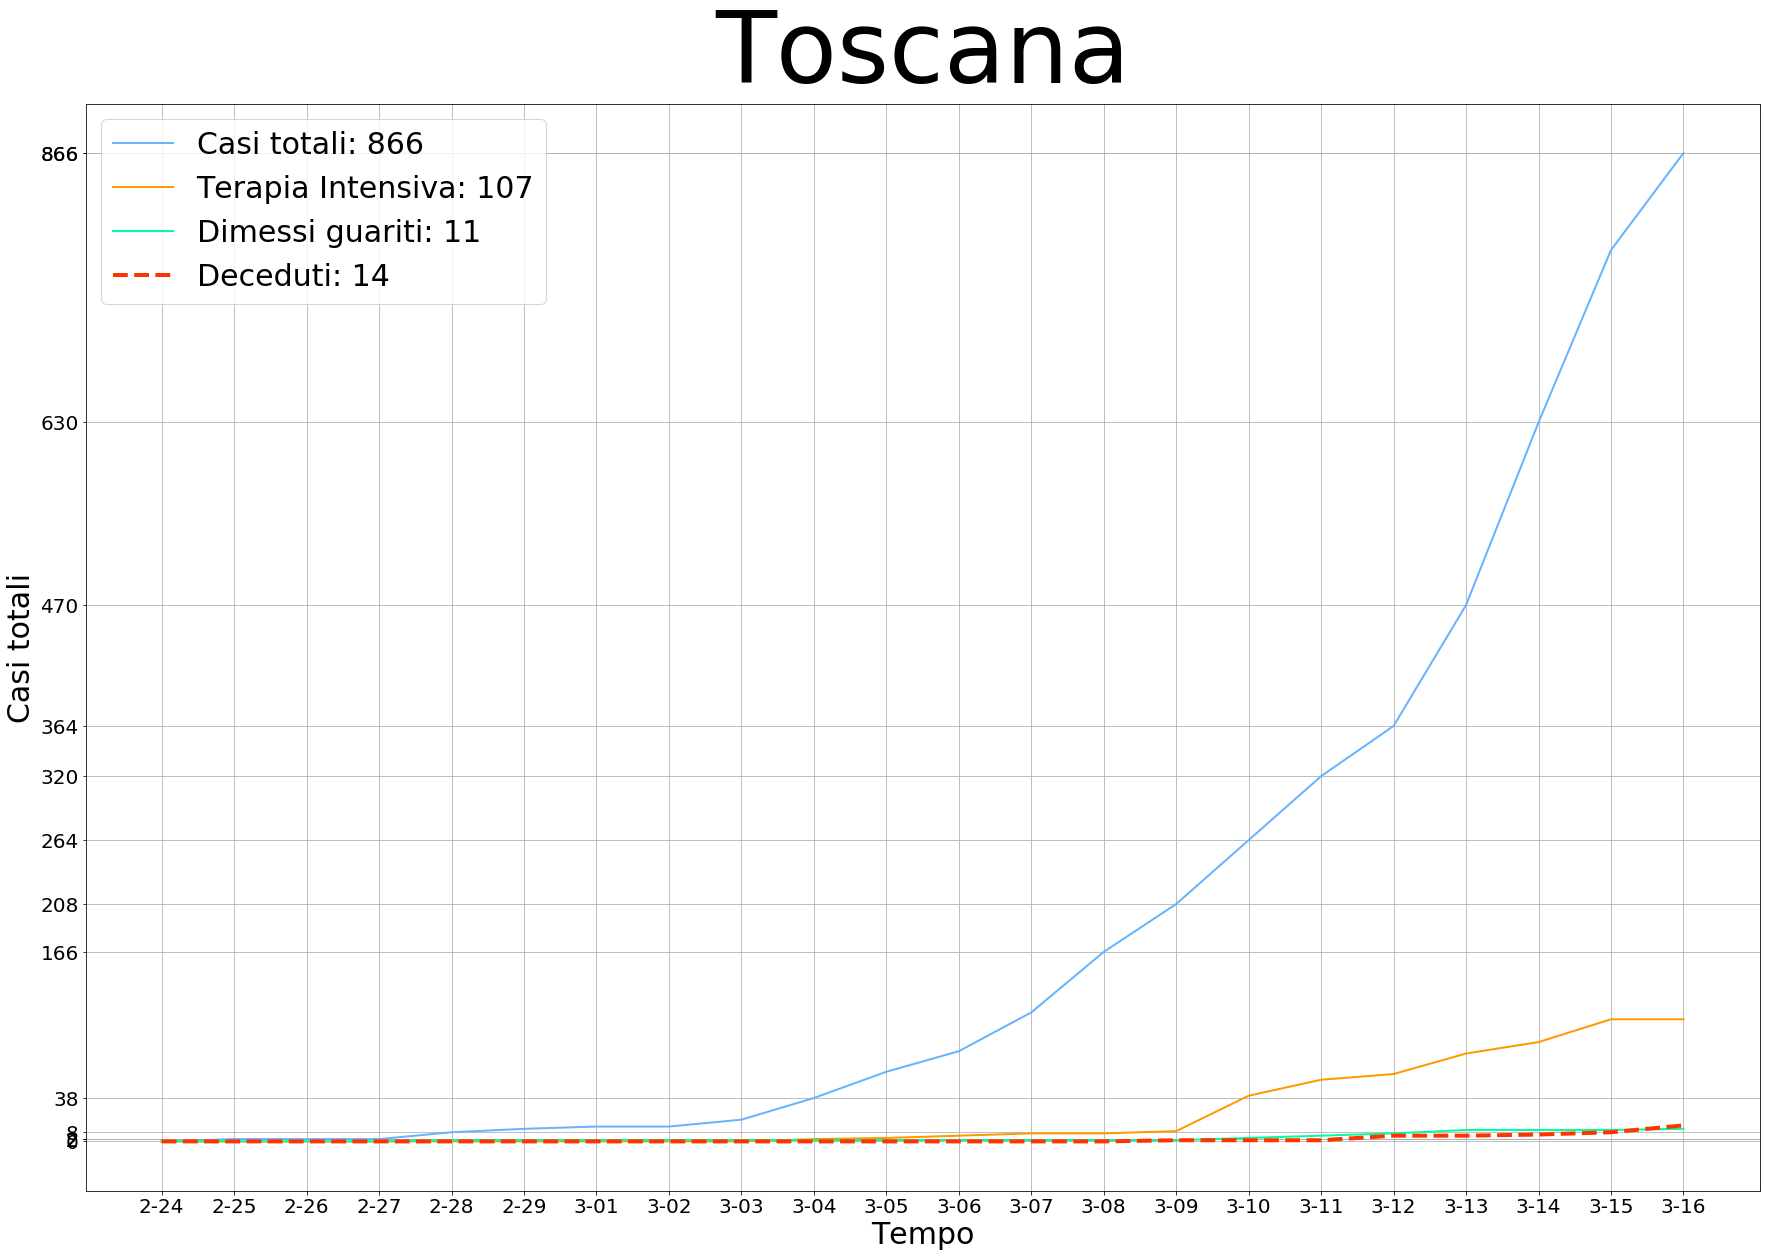

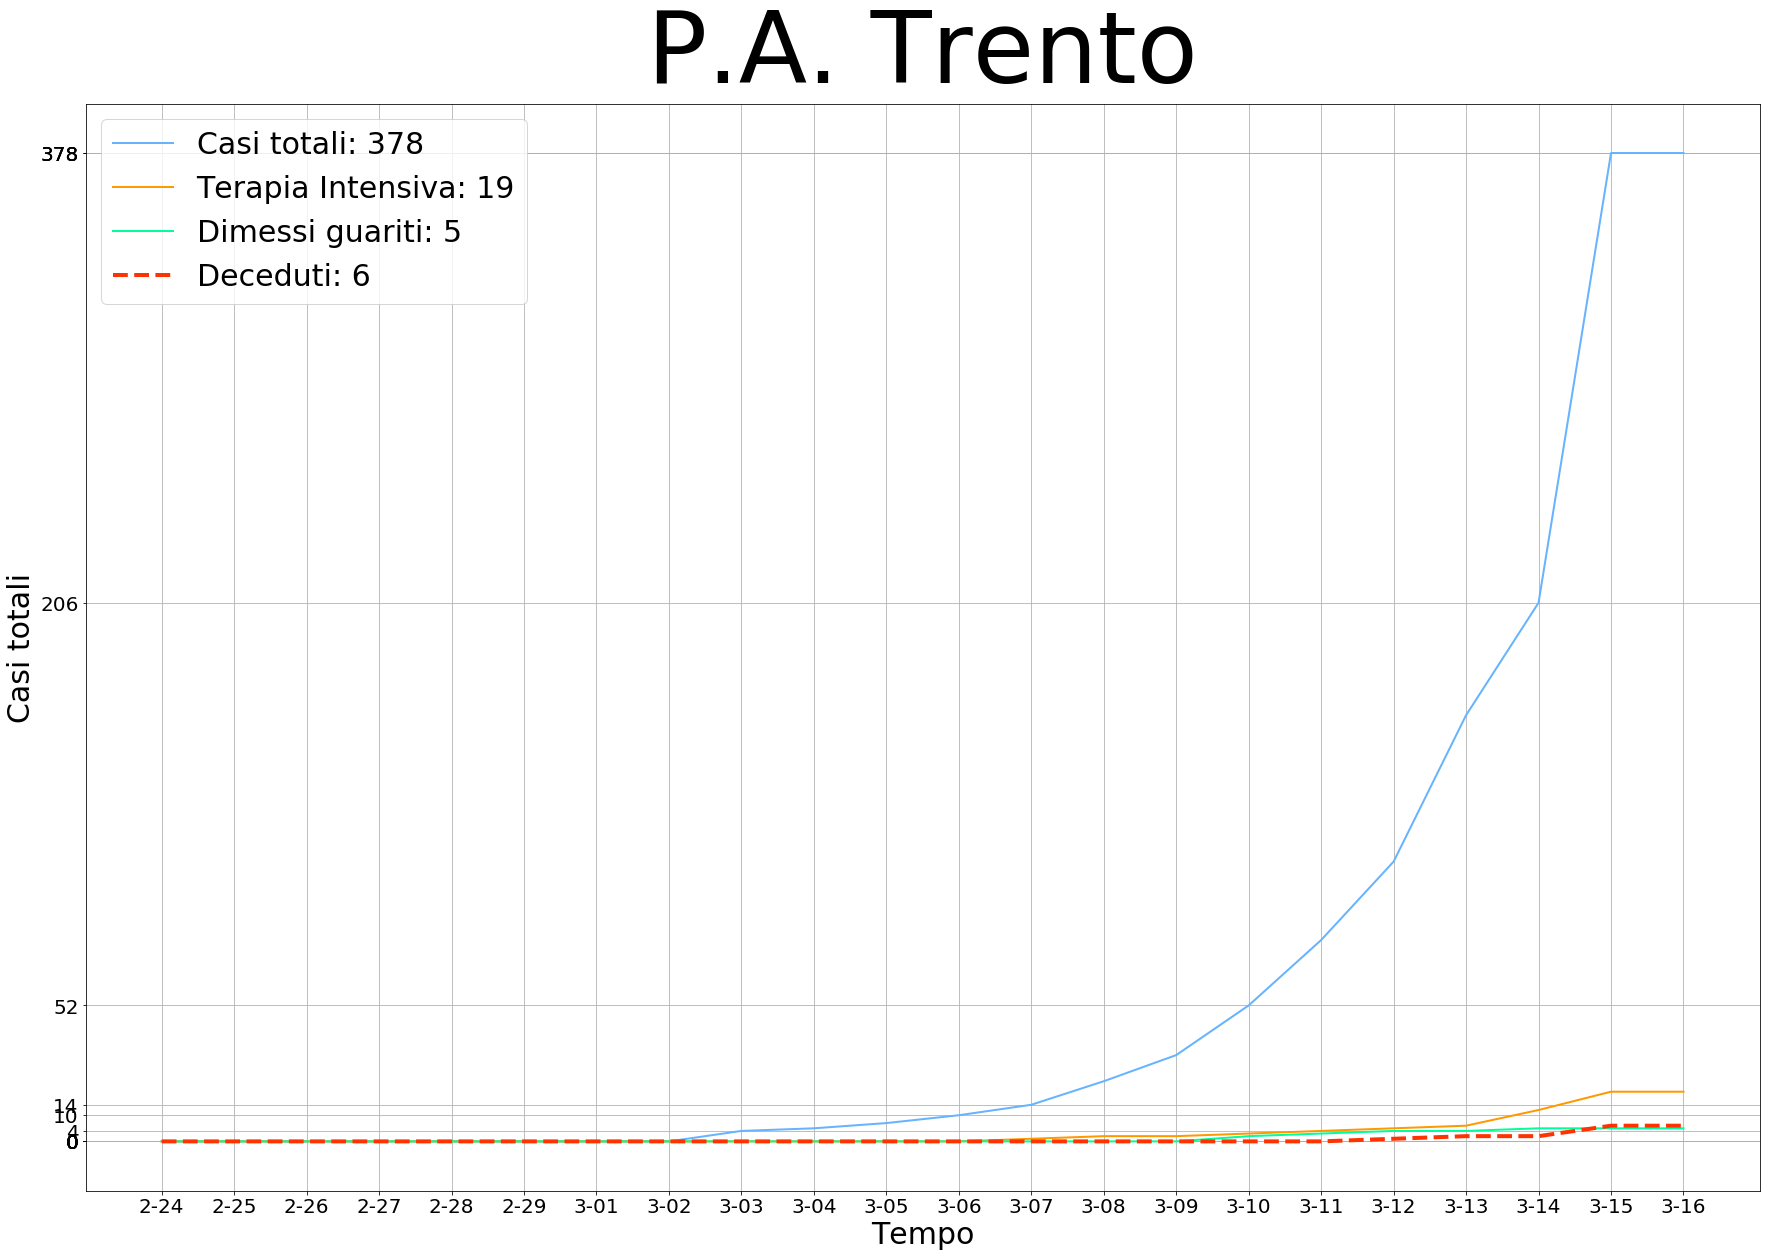

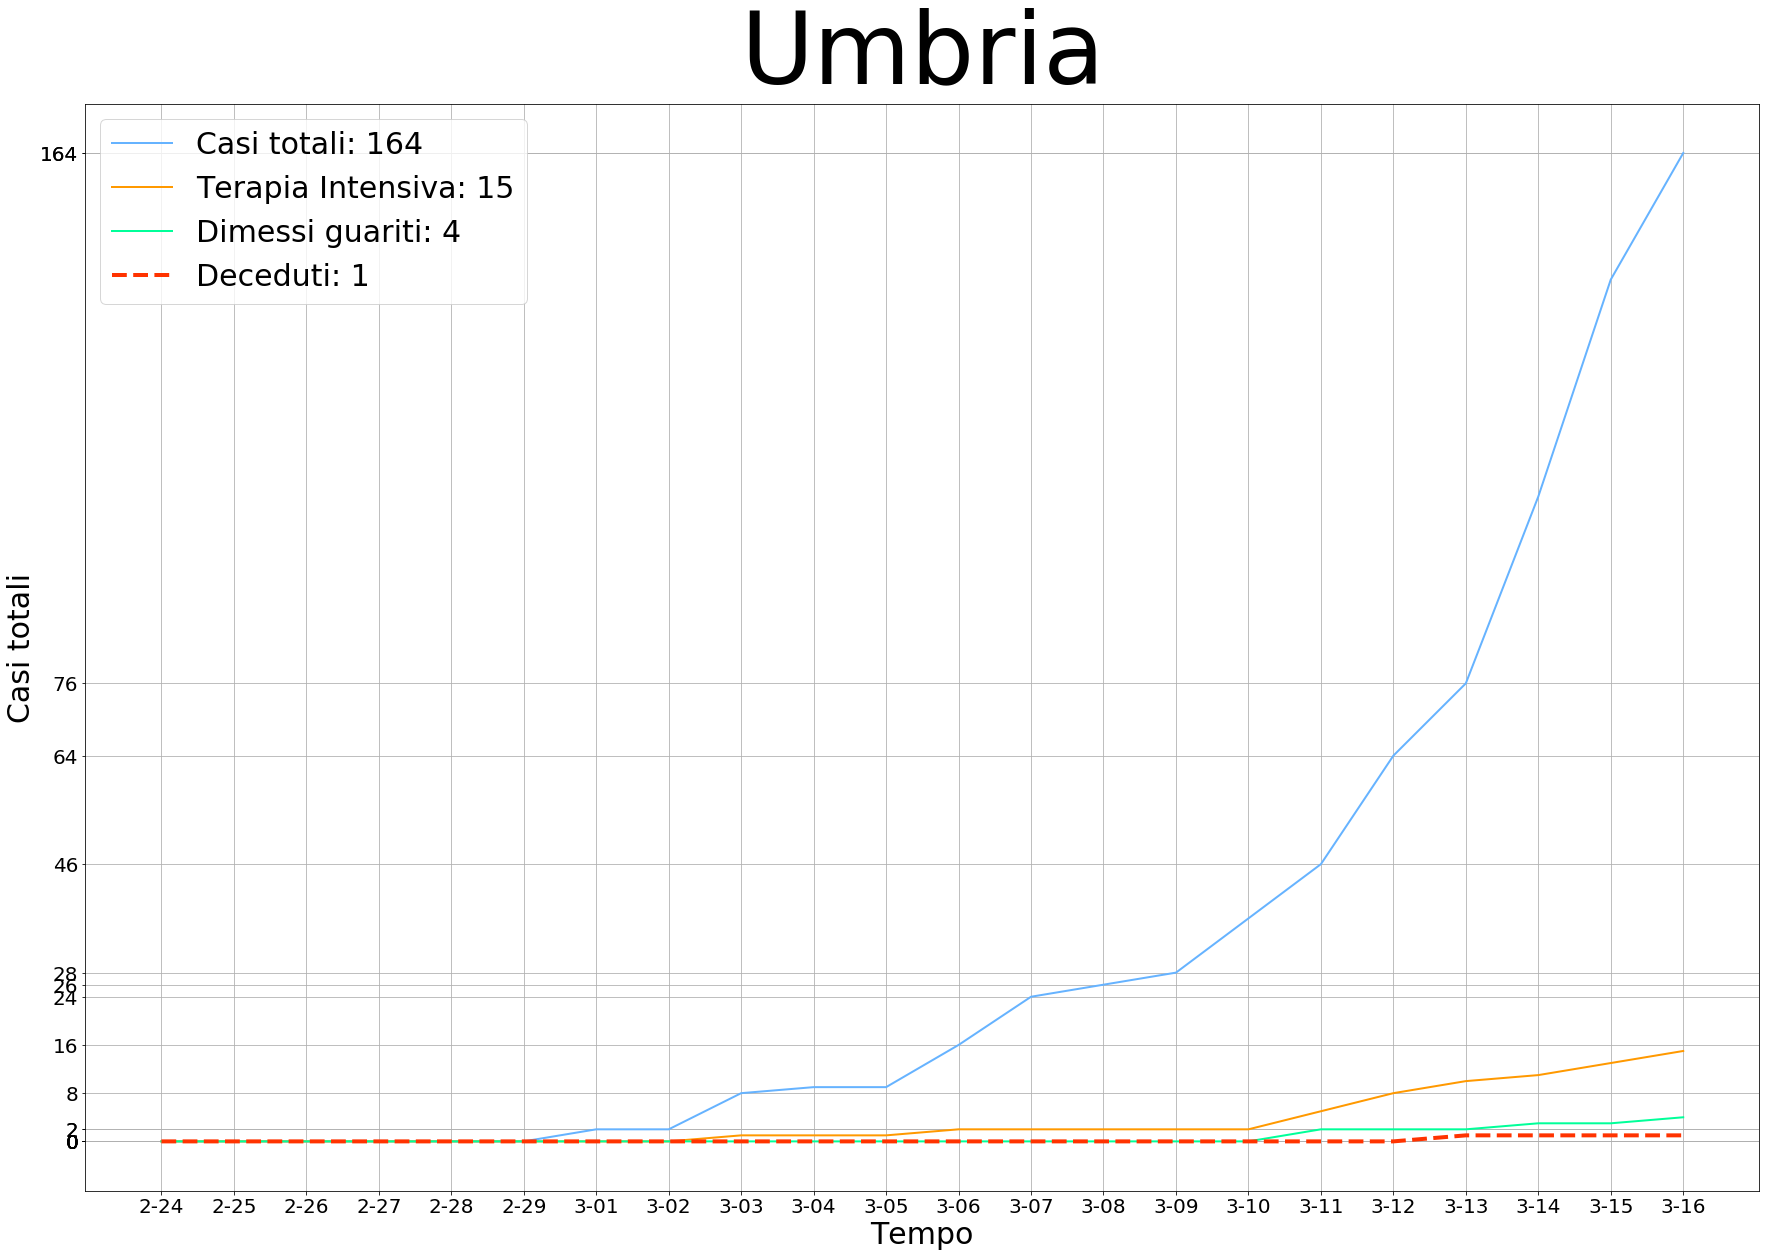

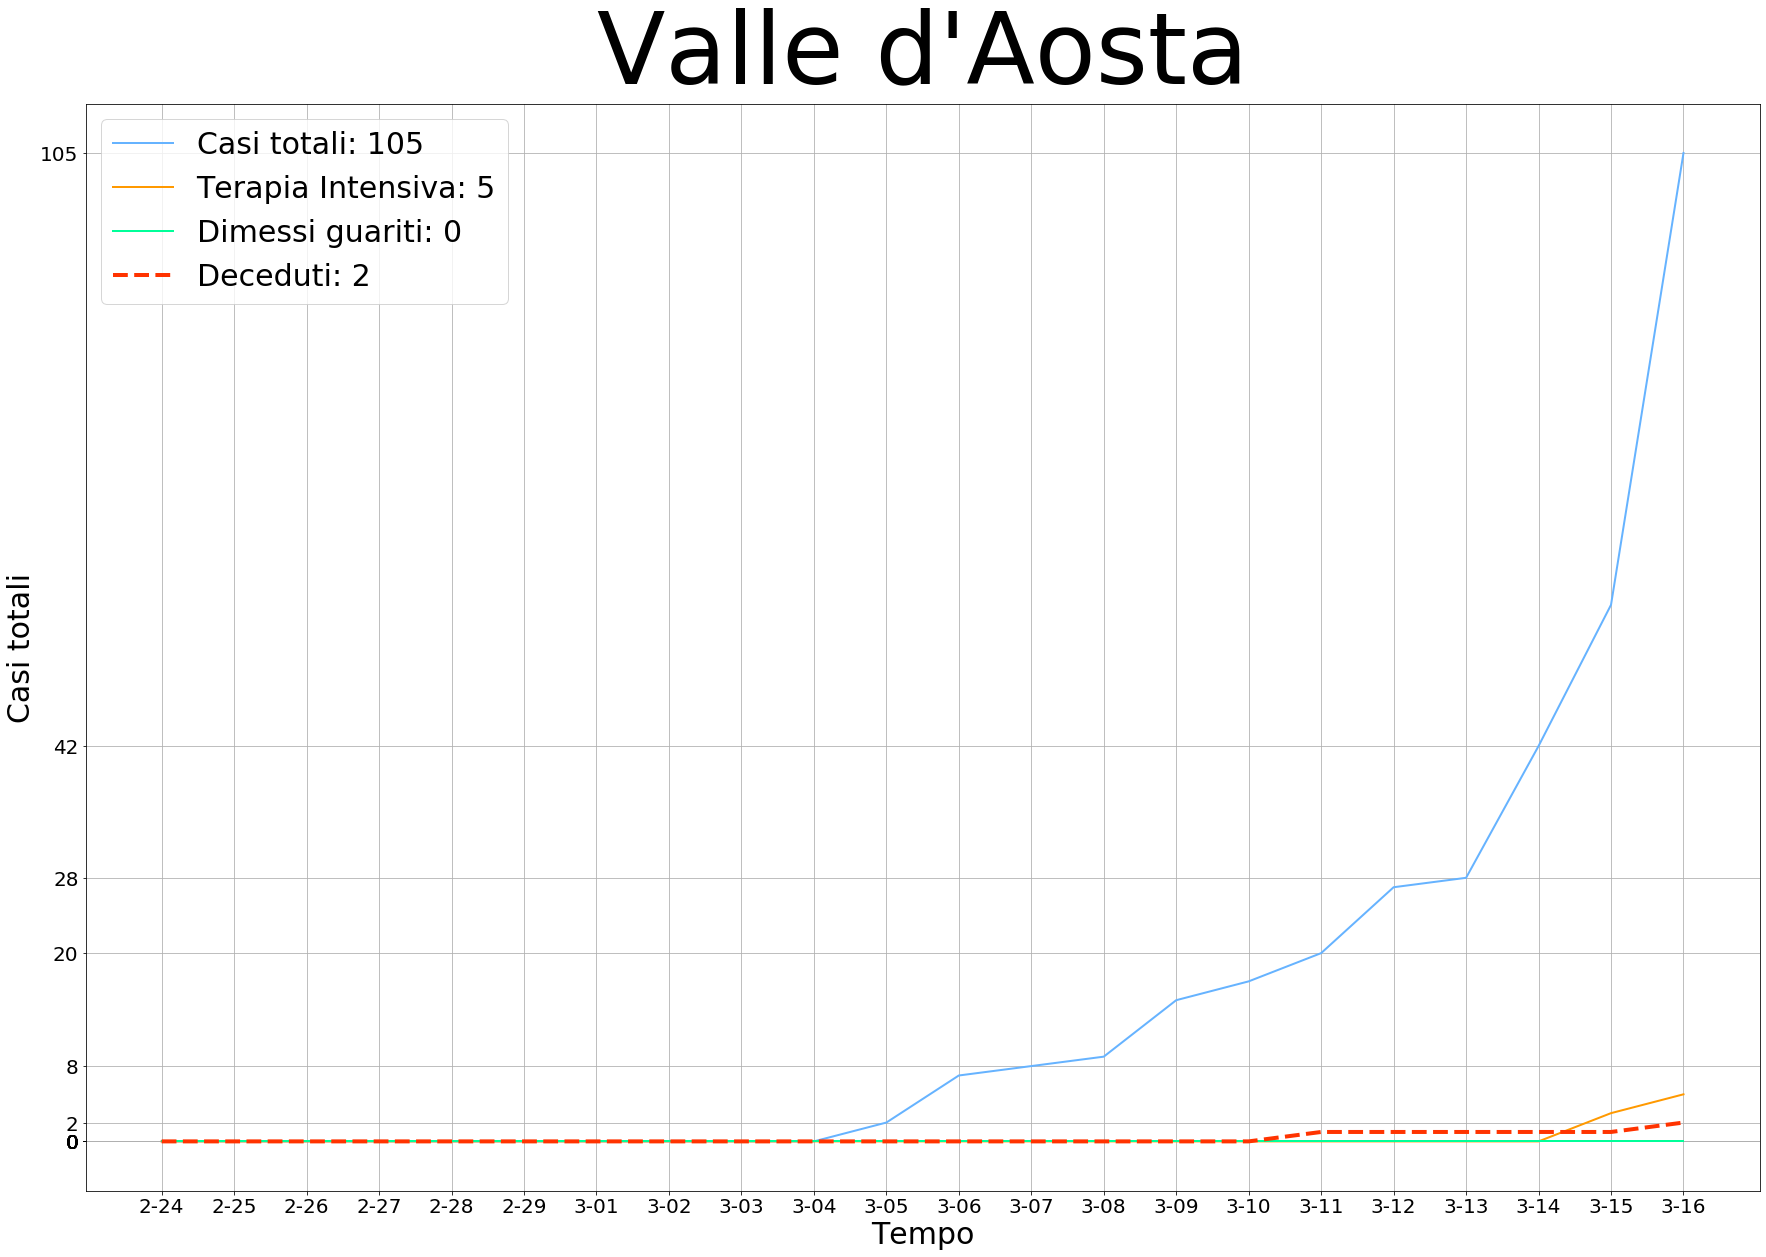

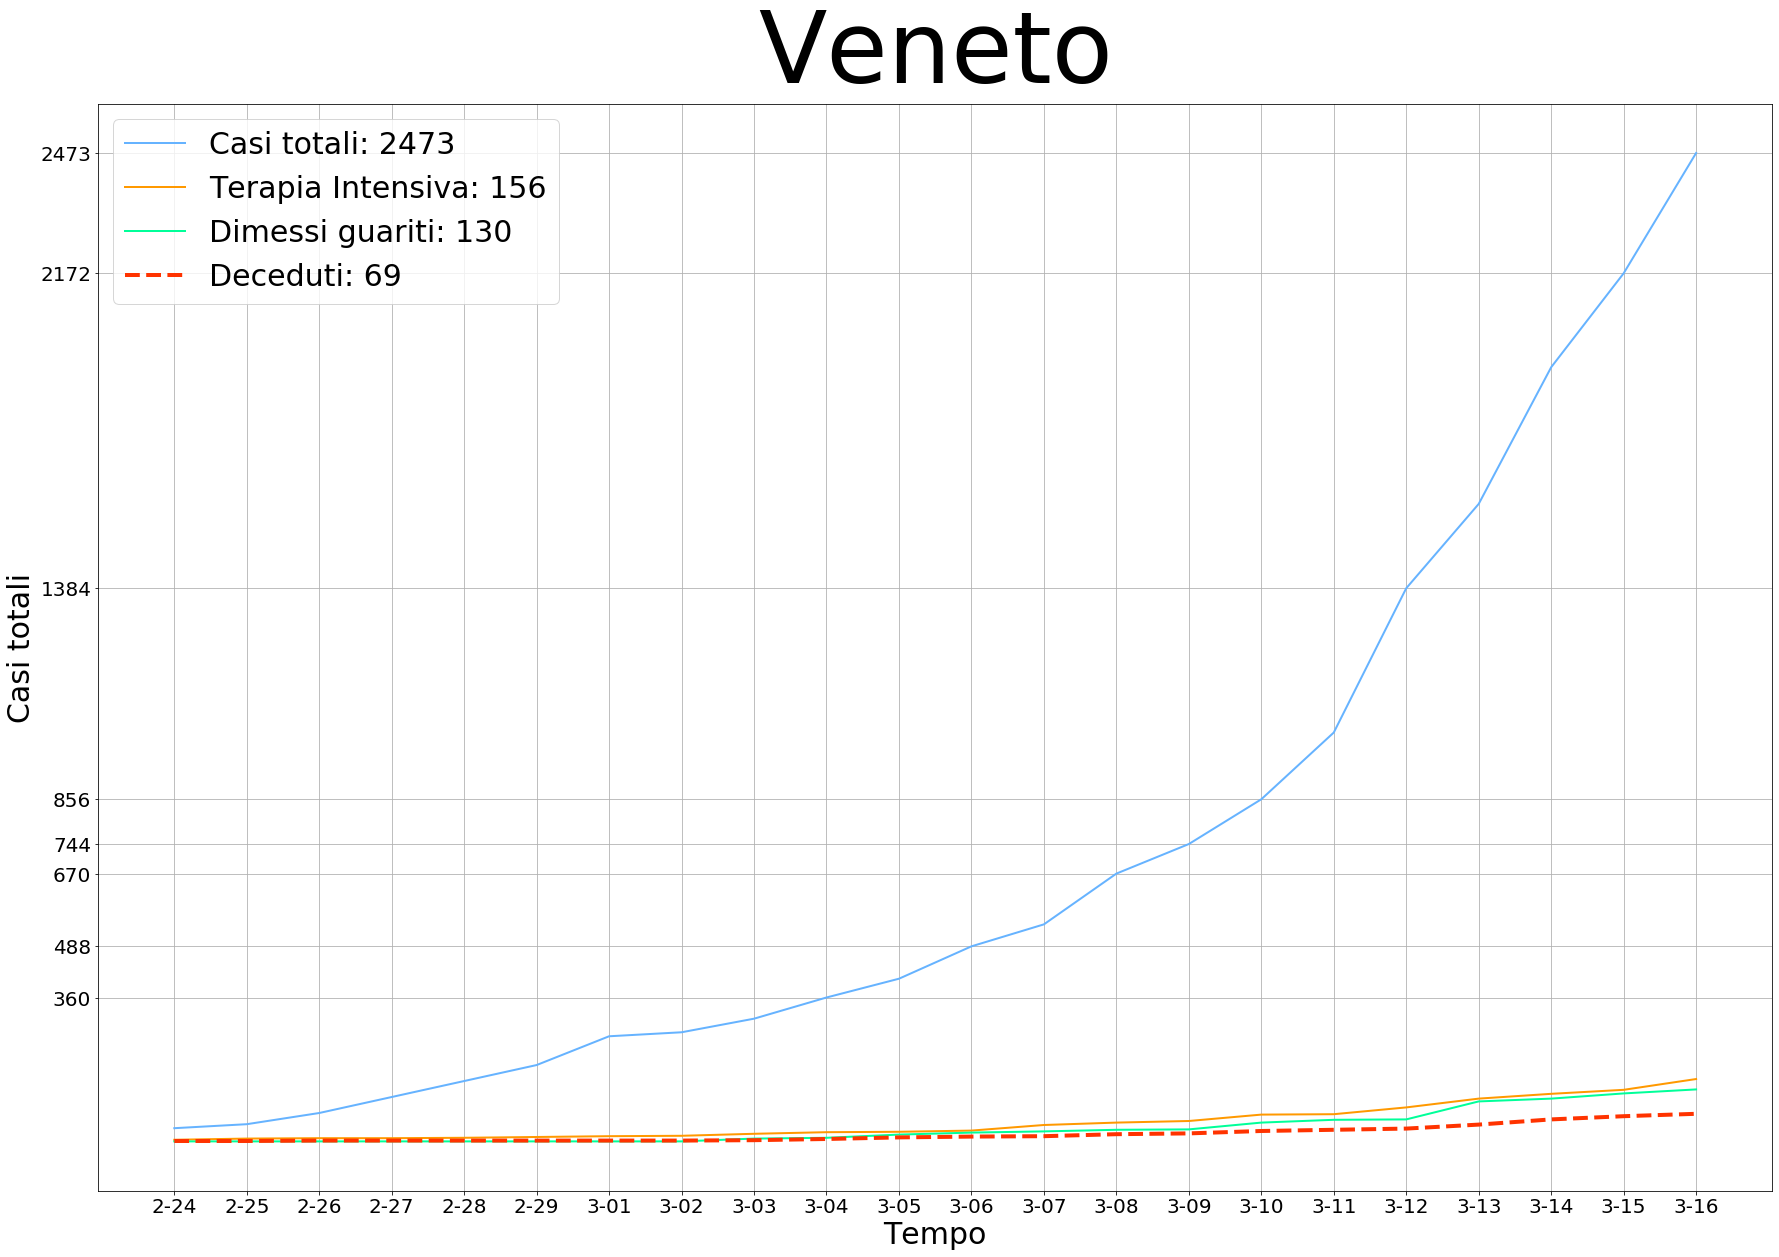

<Figure size 2160x1440 with 0 Axes>

In [55]:
# Manipolazione lista regioni per ottenere i dati raggruppati per regione.

for z in regione_tot:
    regione = df.loc[df['denominazione_regione'] == z]
    x1 = regione.data
    x2 = regione.totale_casi
    x3 = regione.terapia_intensiva
    x4 = regione.deceduti
    x5 = regione.dimessi_guariti
    ticks = []
    ticks_1 = []
    
    x = []
    for f in x1:
        x.append(f[6:10])
    
    legenda_casi_totali = []
    for casi in x2:
        legenda_casi_totali.append(casi)
        
    for w in legenda_casi_totali:
        if w % 2 == 0:
            ticks.append(w)
        else:
            pass
    
    
    legenda_terapia_intensiva = []
    for casi in x3:
        legenda_terapia_intensiva.append(casi)
        
    legenda_deceduti = []
    for casi in x4:
        legenda_deceduti.append(casi)
    
    legenda_guariti = []
    for casi in x5:
        legenda_guariti.append(casi)
    
    ticks_1.append(legenda_casi_totali[-1])
    ticks.extend(ticks_1)

    
    totale_casi = regione.totale_casi
    terapia_intensiva = regione.terapia_intensiva
    deceduti = regione.deceduti
    dimessi_guariti = regione.dimessi_guariti

    plt.rcParams["figure.figsize"]=30,20
    
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=30)
    
    plt.title("{}".format(z), fontsize=100)
    plt.yticks(ticks)
    
    plt.xlabel("Tempo")
    plt.ylabel("Casi totali")
    
    plt.plot(x,totale_casi, color='#66b3ff', linewidth=2, label='Casi totali: {}'.format(legenda_casi_totali[-1]))
    plt.plot(x,terapia_intensiva, color='#ff9900', linewidth=2, label='Terapia Intensiva: {}'.format(legenda_terapia_intensiva[-1]))
    plt.plot(x,dimessi_guariti, color='#00ff99', linewidth=2, label='Dimessi guariti: {}'.format(legenda_guariti[-1]))
    plt.plot(x,deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(legenda_deceduti[-1]))
    plt.legend(prop={'size': 30})
    plt.grid()
    
    # Togliendo il commento tutti i grafici verranno salvati in formato .png in locale
    # plt.savefig('Estrazioni_reg/{}.png'.format(z))
    plt.show()
    plt.clf()


In [44]:
# dati-andamento-nazionale
df_nazionale = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [45]:
df_nazionale.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi'],
      dtype='object')

7.71265189421015


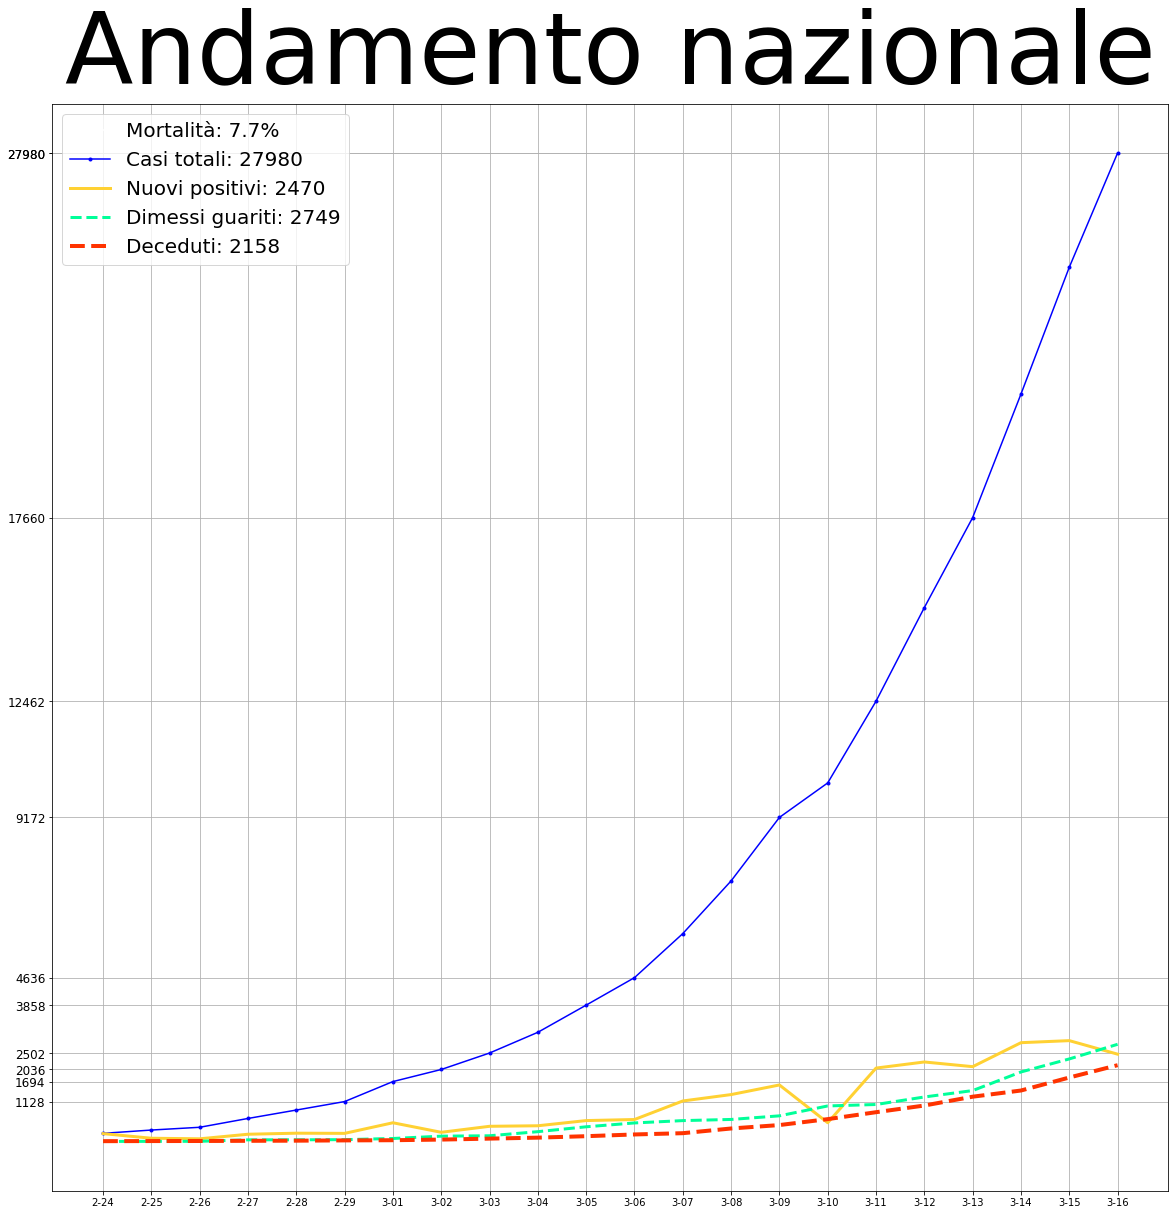

In [40]:
x1 = df_nazionale.data
x = []
for f in x1:
    x.append(f[6:10])

totale_casi = df_nazionale.totale_casi

tot_nuovi_postivi = []
tot_deceduti = []
tot_guariti = []
casi_totali = []
ticks = []
ticks_1 = []

for p in totale_casi:
    casi_totali.append(p)

for w in totale_casi:
    if w % 2 == 0 and w > 1000:
        ticks.append(w)
    else:
        pass

for w1 in df_nazionale.nuovi_attualmente_positivi:
    tot_nuovi_postivi.append(w1)

for w2 in df_nazionale.dimessi_guariti:
    tot_guariti.append(w2)

for w3 in df_nazionale.deceduti:
    tot_deceduti.append(w3)
    


ticks_1.append(casi_totali[-1])
ticks.extend(ticks_1)



nuovi_positivi = df_nazionale.nuovi_attualmente_positivi
totale_deceduti = df_nazionale.deceduti
totale_guariti = df_nazionale.dimessi_guariti

plt.yticks(ticks)


plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rcParams["figure.figsize"]=20,20

toll_1_tot = int(casi_totali[-1])
toll_2_tot = int(tot_deceduti[-1])

death_toll = (toll_2_tot/toll_1_tot)*100
conv_deth_toll = str(death_toll)

plt.plot(death_toll, color='#FFFFFF', label="Mortalità: {}%".format(conv_deth_toll[:3]))
plt.plot(x, totale_casi, 'b.-',label='Casi totali: {}'.format(casi_totali[-1]))
plt.plot(x, nuovi_positivi, color='#FFD133', linewidth=3, label="Nuovi positivi: {}".format(tot_nuovi_postivi[-1]))
plt.plot(x, totale_guariti, color='#00ff99', linestyle="--", linewidth=3, label='Dimessi guariti: {}'.format(tot_guariti[-1]))
plt.plot(x, totale_deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(tot_deceduti[-1]))

plt.title("Andamento nazionale", fontsize=100)
plt.legend(prop={'size': 20})
plt.grid()



print(death_toll)
